# __Part B: Recurrent Neural Network__

<a class="anchor" id="1"></a>
## <font color='#71a1e3'> __Problem Statement__</font>
<hr style="height:1.5px;border-width:0;background-color: #4c8c77">


Build a next-word predictor, given a sequence of words.

The input to your model is a sequence of words of any length (could be one word,
could be five words, etc.).

The output of your model is a word that follows that sequence of words.
In principle, given an input to your model, you can ask your model to predict the next
ten words, by asking your model to predict the next word ten times.

Text generation is a subfield of natural language processing. It leverages knowledge in computational linguistics and artificial intelligence to automatically generate natural language texts, which can satisfy certain communicative requirements and is  a process where an AI system produces written content, imitating human language patterns and styles. The process involves generating coherent and meaningful text that resembles natural human communication.

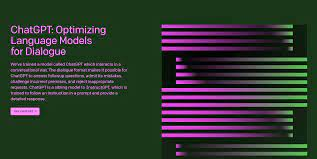

<a class="anchor" id="3"></a>
## <font color='#71a1e3'>__Import Libraries__</font>
<hr style="height:1.5px;border-width:0;background-color: #4c8c77">

Here is to import all the necessary libraries

In [1]:
!pip install --upgrade pip 
!pip install --upgrade Pillow

  Using cached pip-23.3.1-py3-none-any.whl.metadata (3.5 kB)
Using cached pip-23.3.1-py3-none-any.whl (2.1 MB)


ERROR: To modify pip, please run the following command:
C:\Users\ruizh\anaconda3\envs\gpu_env\python.exe -m pip install --upgrade pip


In [2]:
!pip install keras-tuner tensorflow_addons textstat bert_score rouge sentence_transformers seaborn spacy wordcloud

### Other Import

In [3]:
# !python -m spacy download en_core_web_lg
# !python -m spacy download en_core_web_sm

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import math
import nltk
import spacy
import random
import nltk
import random
from nltk.corpus import wordnet

nltk.download('wordnet')
from nltk.corpus import wordnet
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nlp = spacy.load('en_core_web_sm')
from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from collections import Counter
from rouge import Rouge 
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer
from bert_score import score
import textstat
import random
import warnings
from nltk import FreqDist
warnings.filterwarnings('ignore')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ruizh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ruizh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ruizh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ruizh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ruizh\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
c:\Users\ruizh\anaconda3\envs\gpu_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywid

### Tensorflow Import

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import L1L2
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.translate.bleu_score import sentence_bleu
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras.utils import Sequence, to_categorical
from tensorflow import expand_dims
from tensorflow.keras import Sequential
from tensorflow.keras import layers as L
from tensorflow.keras import backend as K
from tensorflow.image import random_flip_left_right, random_crop, resize_with_crop_or_pad
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import (Dense, Input, InputLayer, Normalization, Flatten,BatchNormalization,
    Dropout,Conv2D, GlobalAveragePooling2D, MaxPooling2D, ReLU, Layer,Activation, Multiply, AveragePooling2D,
    Add, RandomRotation,Resizing, Rescaling, Reshape, Concatenate, concatenate, Lambda,LeakyReLU, ZeroPadding2D)
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler, ReduceLROnPlateau, TerminateOnNaN, TensorBoard, CSVLogger, Callback
from tensorflow.keras.backend import clear_session
from tensorflow.keras.optimizers import RMSprop, SGD, Adam, Adagrad, Adamax
from tensorflow.keras.regularizers import l2, L2
from tensorflow.keras.optimizers.schedules import *
from tensorflow.keras.metrics import FalseNegatives, categorical_crossentropy, sparse_categorical_crossentropy
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.image import *
from tensorflow.keras.layers import Embedding, GRU
from tensorflow_addons.optimizers import SWA
from kerastuner.tuners import Hyperband
from kerastuner import RandomSearch
from kerastuner import HyperModel

Using TensorFlow backend


<a class="anchor" id="3"></a>
## <font color='#71a1e3'>__Import Dataset__</font>
<hr style="height:1.5px;border-width:0;background-color: #4c8c77">

Here is to import the data

In [6]:
df=pd.read_csv('train.csv')
print("Shape of data=>",df.shape)

Shape of data=> (1000, 1)


<a class="anchor" id="3"></a>
## <font color='#71a1e3'>__Data Understanding__</font>
<hr style="height:1.5px;border-width:0;background-color: #4c8c77">

Here is to do the the basic understanding of dataset

### **Get the basic info of the dataset**

This gives us an idea of what the dataset is all about

In [7]:
basic_stats = df['Quotes'].describe()
basic_stats

count                                                  1000
unique                                                  890
top       Radiate acceptance, and find peace in embracin...
freq                                                      5
Name: Quotes, dtype: object

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>
<ul>

- From the basic stats above, we can see that the dataset has length of quotes between 7 and 35
</div>

In [8]:
df['tokens'] = df['Quotes'].str.split()
df['token_count'] = df['tokens'].apply(len)
print("Total documents:", df.shape[0])
print("Mean word count:", df['token_count'].mean())
print("Vocabulary size:", len(set(df['Quotes'].str.cat(sep=' ').split())))

Total documents: 1000
Mean word count: 11.865
Vocabulary size: 1592


<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>
<ul>

- From the above, we can see that the total count is 1000
- Mean word count is 11.865
- Vocab size with 1574
</div>

### Checking for Null Values

In [9]:
df.isnull().sum()

Quotes         0
tokens         0
token_count    0
dtype: int64

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>
<ul>

- From above we can see that their is no null values in this dataset
</div>

<a class="anchor" id="3"></a>
## <font color='#71a1e3'>__Exploratory Data Analysis__</font>
<hr style="height:1.5px;border-width:0;background-color: #4c8c77">

Here is to do the Exploratory Data Analysis

### Distribution Analysis
This is to visualsie the distribution of the word of quotes in the dataset
- Tells us about the skewness of the data

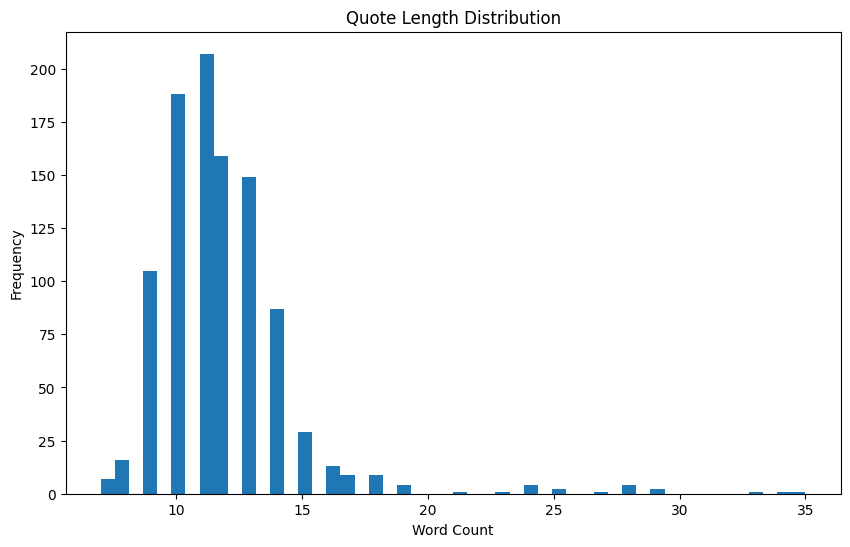

In [10]:
plt.figure(figsize=(10, 6))
plt.hist(df['token_count'], bins=50)
plt.title('Quote Length Distribution')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

### Other Distribution
- Here we will analysis on the unique world count and the average word length distribution

In [11]:
df['word_count'] = df['Quotes'].apply(lambda x: len(x.split()))
df['unique_word_count'] = df['Quotes'].apply(lambda x: len(set(x.split())))
df['avg_word_length'] = df['Quotes'].apply(lambda x: sum(len(word) for word in x.split()) / len(x.split()))

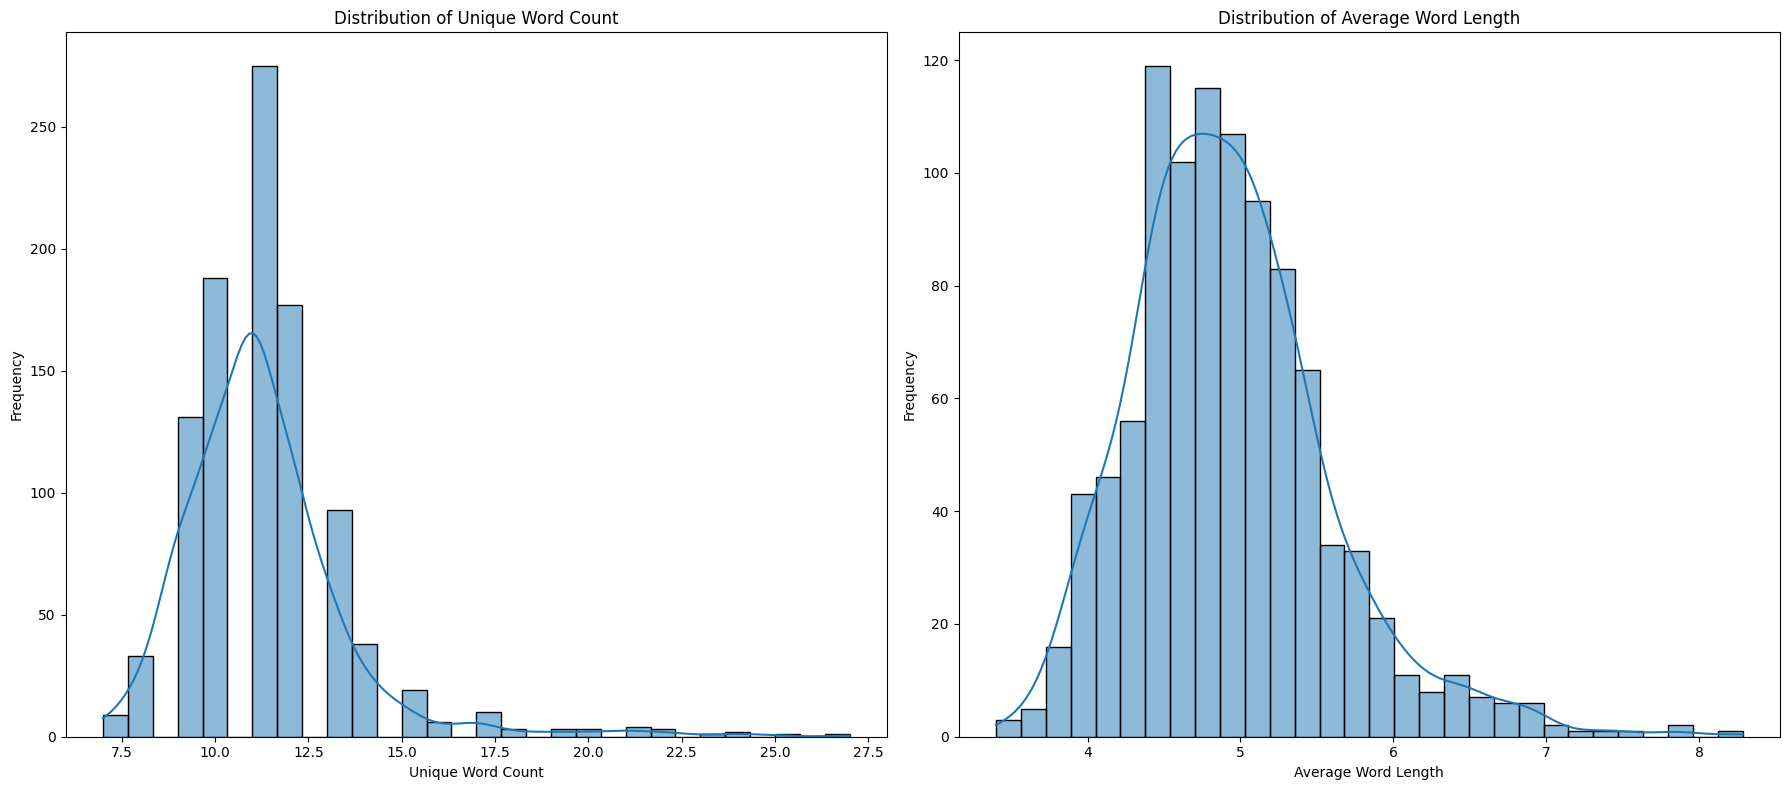

In [12]:
plt.figure(figsize=(18, 8))

plt.subplot(1, 2, 1)
sns.histplot(df['unique_word_count'], bins=30, kde=True)
plt.title('Distribution of Unique Word Count')
plt.xlabel('Unique Word Count')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df['avg_word_length'], bins=30, kde=True)
plt.title('Distribution of Average Word Length')
plt.xlabel('Average Word Length')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>
<ul>

- We can see that all the three word count, unique word count and average word length are all positively skewed
</div>

### Word Cloud

- This shows which all the words in the dataset
- Those words that appear bigger in size have greater occurence

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ruizh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


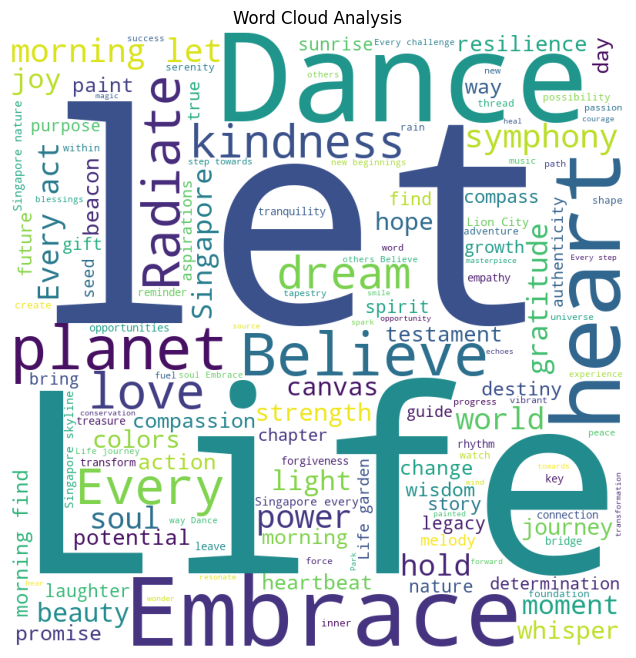

In [13]:
nltk.download('stopwords')

# Generate the word cloud with default settings
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      stopwords=set(stopwords.words('english')),
                      min_font_size=10).generate(' '.join(df['Quotes']))

# Display the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.title('Word Cloud Analysis')
plt.imshow(wordcloud)
plt.axis("off")  # Turn off the axis
plt.show()

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>
<ul>

- From above, we can see that words like Let life, dance appear pretty commonly

### Word Character Distribution

- Analyse on the distribution of word character in the dataset

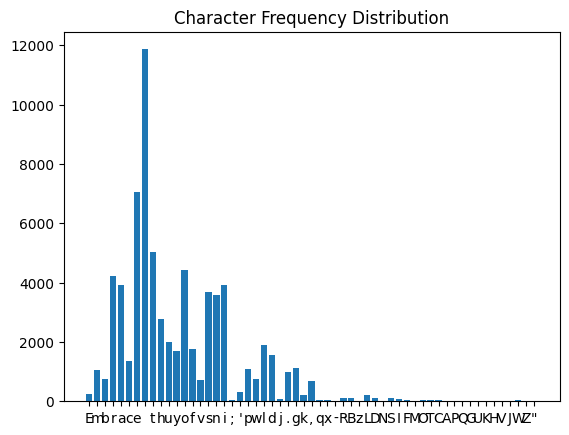

In [14]:
full_text = " ".join(df['Quotes'])

char_freq = Counter(full_text)
plt.bar(char_freq.keys(), char_freq.values())
plt.title('Character Frequency Distribution')
plt.show()

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>
<ul>

- From above, we can see that words are distributed with most at the character e

### Bi-gram Analysis

- Analysis on a pair of consecutive words
- Words that appear more common together

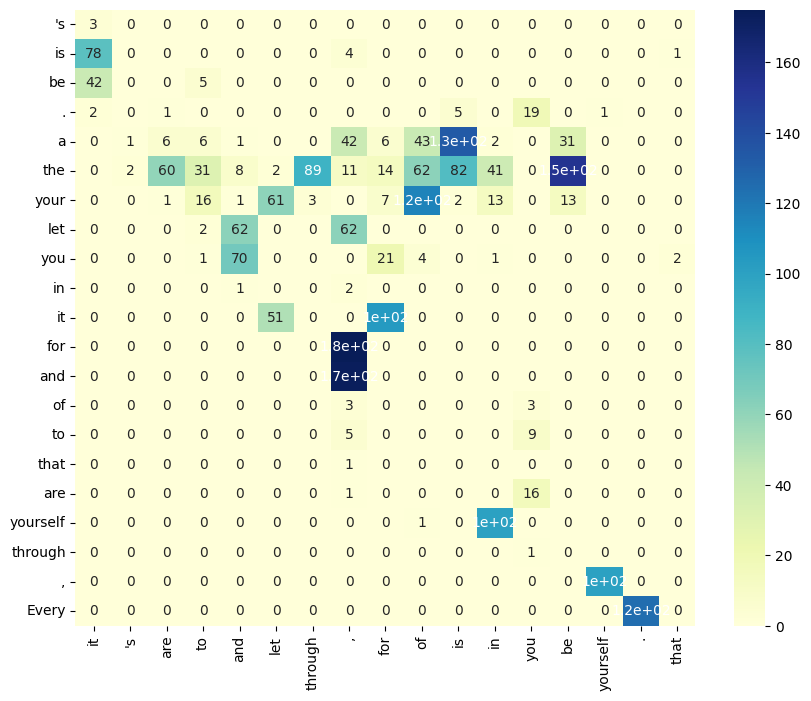

In [15]:
tokens = word_tokenize(full_text)
bi_grams = list(nltk.bigrams(tokens))
fdist = FreqDist(tokens)
common_words = set(word for word, freq in fdist.items() if freq > 100)
filtered_bi_grams = [(w1, w2) for w1, w2 in bi_grams if w1 in common_words and w2 in common_words]
co_occurrence_matrix = pd.DataFrame(nltk.ConditionalFreqDist(filtered_bi_grams)).fillna(0).astype(int)
plt.figure(figsize=(10, 8))
sns.heatmap(co_occurrence_matrix, annot=True, cmap="YlGnBu")
plt.show()

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>
<ul>

- From above, we can that worlds like for and , occurs the most frequently in the dataset

### Top 5 Most Frequent Words

- This will tells us the most frequent words appearing in the dataset

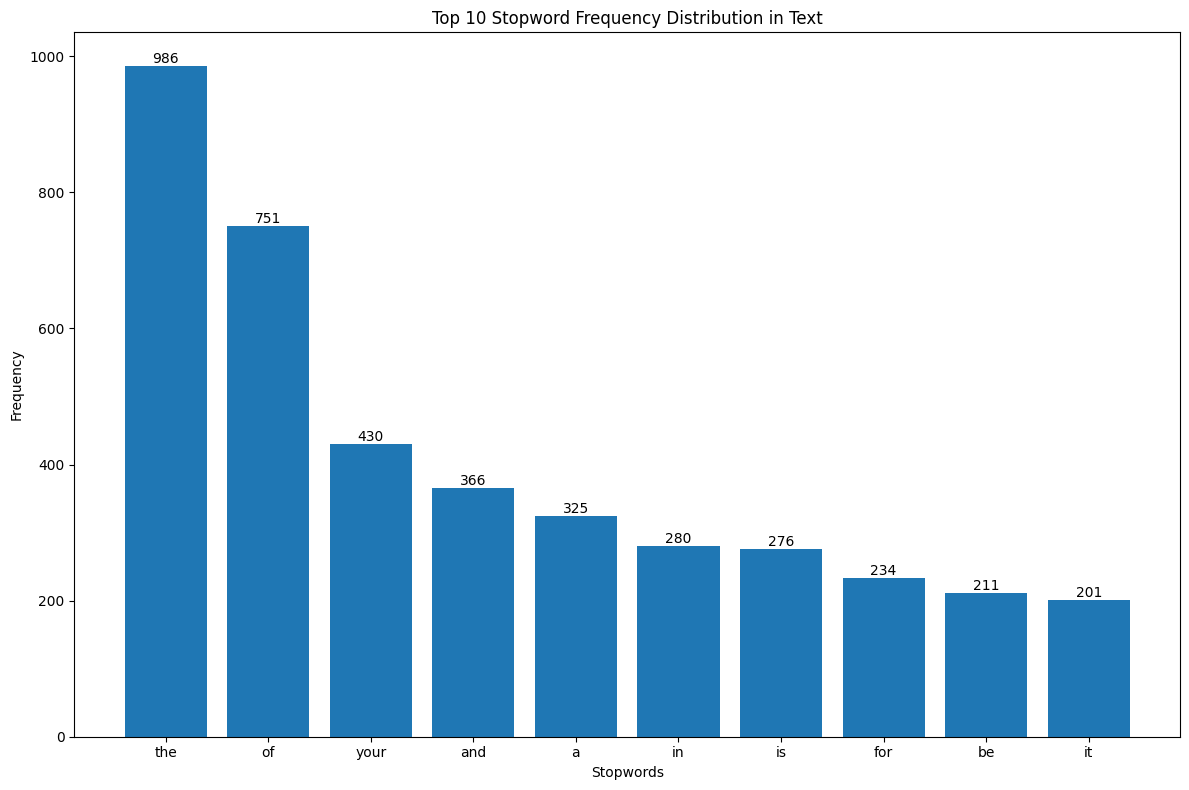

In [16]:
stopwords_text = nltk.corpus.stopwords.words('english')
stopwords_set = set(stopwords_text)
stopword_freq = dict(sorted(Counter(w.lower() for w in word_tokenize(full_text) if w.lower() in stopwords_set).items(), key=lambda x: x[1], reverse=True)[:10])

plt.figure(figsize=(12, 8), facecolor=None)
bars = plt.bar(stopword_freq.keys(), stopword_freq.values())

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')
plt.xlabel('Stopwords')
plt.ylabel('Frequency')
plt.title('Top 10 Stopword Frequency Distribution in Text')
plt.tight_layout()
plt.show()

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>
<ul>

- From above, the, of your and that are all words that are short and are adjective mostly

### Lexical Richess Analysis
Measuring lexical richness is generally concerned with how many different words are used in a text (spoken or written).

In [17]:
def lexical_richness(text):
    words = text.split()
    return len(set(words)) / len(words) if words else 0

df['lexical_richness'] = df['Quotes'].apply(lexical_richness)
print(df['lexical_richness'].describe())

count    1000.000000
mean        0.957596
std         0.061991
min         0.657143
25%         0.916667
50%         1.000000
75%         1.000000
max         1.000000
Name: lexical_richness, dtype: float64


<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>
<ul>

- From above, the dataset has a pretty high mean lexcial richness score

### Flesch Reading Ease

It then calculates the average number of words per sentence and the average number of syllables per word, and basically tells us how easy it is to read the text

In [18]:
flesch_reading_score = textstat.flesch_reading_ease(df['Quotes'][0])
print(flesch_reading_score)

80.62


<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>
<ul>

- From above, the dataset is suitable for 6th grader to read with a score of 80.62

<a class="anchor" id="3"></a>
## <font color='#71a1e3'>__Data Preprocessing (1)__</font>
<hr style="height:1.5px;border-width:0;background-color: #4c8c77">

Here is to do data preprocessing part 1

### Clearning the commas and capilalisation

- Dataset contains some form of commas and upper case letters, here it is to preprocess the data

In [19]:
df['clean_text'] = df['Quotes'].str.lower().str.replace(r'[^\w\s]+', '')
df['clean_text']

0      embrace the beauty of every sunrise; it's a fr...
1      embrace challenges; they are the stepping ston...
2      embrace the rhythm of life and let it dance th...
3      embrace kindness, for it has the power to chan...
4      embrace the journey, for it leads to the desti...
                             ...                        
995    with an open heart, welcome the opportunities ...
996    this morning, let your laughter be the music t...
997    in the serenity of this morning, find the powe...
998    this morning, let your actions be a testament ...
999    with each sunrise, this morning offers the pro...
Name: clean_text, Length: 1000, dtype: object

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>
<ul>

- From above, the dataset has been preprocess correctly 

### Convert sequences to sequence of numbers

- This is so that we are able to have an input and label for x and y for model training
- Here we will have input sequences from 2 to the length of the quotes
- Use the tokenizer from nltk library

In [20]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['Quotes'])
total_words = len(tokenizer.word_index) + 1
tokenizer

In [21]:
input_sequences = []
for line in df['Quotes']:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)
len(input_sequences)

10886

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>
<ul>

- From above, we can see that the shape of the list is 10886

<a class="anchor" id="2"></a>
## <font color='#71a1e3'>__Feature Engineering__</font>
<hr style="height:1.5px;border-width:0;background-color: #4c8c77">

Here we will feature engineer the dataset

### Padding of sequences

- The padding of sequences ensures that all are of the same length 
- Provide consistent shape and size
- This is so that we can batched the dataset as sequences with different length is unable to do so

In [22]:
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
input_sequences.shape

(10886, 35)

<a class="anchor" id="3"></a>
## <font color='#71a1e3'>__Data Preprocessing (2)__</font>
<hr style="height:1.5px;border-width:0;background-color: #4c8c77">

Here is to do data preprocessing part 2

### Splitting dataset into inputs, labels

This is where we create the x and y variable for input into model fitting later

In [96]:
x, y = input_sequences[:,:-1],input_sequences[:,-1]
y = tf.keras.utils.to_categorical(y, num_classes=total_words)
x,y

(array([[  0,   0,   0, ...,   0,   0,  19],
        [  0,   0,   0, ...,   0,  19,   1],
        [  0,   0,   0, ...,  19,   1,  53],
        ...,
        [  0,   0,   0, ...,   2,   1, 614],
        [  0,   0,   0, ...,   1, 614,   2],
        [  0,   0,   0, ..., 614,   2,  13]]),
 array([[0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32))

<a class="anchor" id="2"></a>
## <font color='#71a1e3'>__Required Functions__</font>
<hr style="height:1.5px;border-width:0;background-color: #4c8c77">

Here we will define the required function

### Loss and Accuracy Curve

1. Loss Curve:
   - Calculates the actual difference between the model's prediction and the actual true output
   - By minimising the loss, the model aims to make its predictions as close as possible to the true value
   - Shows us the loss over iterations
   - ![Loss Curve](https://api.wandb.ai/files/mostafaibrahim17/images/projects/37042936/4cdebc09.png)
3. Accuracy Curve:
   - This us how good the model is at making correct predictions on the training data as it goes through the training process.
   - It is measured in percentages and tells us the proportion of instances the model correctly classified out of the total number of instances
   - Tells us how well the model fit with the data
   - ![Accuracy Curve](https://api.wandb.ai/files/mostafaibrahim17/images/projects/37042936/4cdebc09.png)

In [24]:
def plot_model_history(model_history):
    history_df = pd.DataFrame(model_history)
    fig, axs = plt.subplots(1, 2, figsize=(14, 5))

    axs[0].plot(history_df['loss'], 'g--', label='Training Loss')
    axs[0].set_title('Training Loss')
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('Loss')
    axs[0].legend()
    axs[0].grid(True)

    if 'accuracy' in history_df or 'val_accuracy' in history_df:
        axs[1].plot(history_df['accuracy'], 'g--', label='Training Accuracy')
        axs[1].set_title('Training Accuracy')
        axs[1].set_xlabel('Epochs')
        axs[1].set_ylabel('Accuracy')
        axs[1].legend()
        axs[1].grid(True)

    plt.tight_layout()
    plt.close(fig)

    def show():
        display(fig)

    return show

### Predict Next 10 Words function

- Here it is to add the function that can predict the next 10 words
- This is so that we can fit into the model training and evalute on the result

In [25]:
def predict_next_word(model, seed_text, num_to_predict=10, temperature=0.5):
    for _ in range(num_to_predict):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        
        predicted_probs = model.predict(token_list, verbose=0)[0]
        preds = np.asarray(predicted_probs).astype('float64')
        preds = np.log(preds + 1e-8) / temperature  
        exp_preds = np.exp(preds)
        preds = exp_preds / np.sum(exp_preds)
        probabilities = np.random.multinomial(1, preds, 1)
        predicted_index = np.argmax(probabilities)
        output_word = tokenizer.index_word[predicted_index]
        seed_text += " " + output_word
    return seed_text


### Setting the SEED text

- Here are the text that are being tested on

In [26]:
seed_texts = ['embrace each day',
'radiate some',
'believe that',
"life's actual purpose is",
'dance through each and every',
'let your time and energy',
'every person is',
'our country Singapore is',
'planet earth is',
'morning and evening would make it']



### Setting the paramters

In [27]:
LR = 0.01
MOMENTUM = 0.9
WEIGHT_DECAY = 0.0005
val_split = 0.2
max_epochs = 100


In [28]:
base_hparams = {"val_split" : val_split, "max_epochs" : max_epochs,"batch_size" : 128}

### Custom Callback
- Since accuracy and loss may not be the best metric to follow, let us create a custom callback with other evaluation metrics

In [29]:
class CustomMetric(tf.keras.callbacks.Callback):
    def __init__(self, seed_texts, target_texts, model, tokenizer, max_len):
        self.seed_texts = seed_texts
        self.target_texts = target_texts
        self.model = model
        self.tokenizer = tokenizer
        self.max_len = max_len
        self.embedding_model = SentenceTransformer('all-MiniLM-L6-v2')

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        generated_texts = [self.predict_next_word(seed_text) for seed_text in self.seed_texts]
        cosine_scores = self.calculate_cosine_similarity(self.seed_texts, generated_texts)
        lexical_diversity = self.lexical_diversity(generated_texts)
        logs['mean_cosine_similarity'] = np.mean(cosine_scores)
        logs['mean_lexical_diversity'] = np.mean(lexical_diversity)
        print(f'\nEpoch {epoch + 1} - Mean Cosine Similarity: {np.mean(cosine_scores)} - Lexical Diversity: {np.mean(lexical_diversity)} ')
        
    def predict_next_word(self, seed_text, num_to_predict=10, temperature=1):
        for _ in range(num_to_predict):
            token_list = self.tokenizer.texts_to_sequences([seed_text])[0]
            token_list = pad_sequences([token_list], maxlen=self.max_len - 1, padding='pre')

            predicted_probs = self.model.predict(token_list, verbose=0)[0]
            preds = np.asarray(predicted_probs).astype('float64')
            preds = np.log(preds + 1e-8) / temperature  
            exp_preds = np.exp(preds)
            preds = exp_preds / np.sum(exp_preds)
            probabilities = np.random.multinomial(1, preds, 1)
            predicted_index = np.argmax(probabilities)
            output_word = self.tokenizer.index_word.get(predicted_index, '')
            seed_text += " " + output_word
        return seed_text
    
    def bleu(self,  seed_texts, generated_texts):
        bleu_scores = []
        for seed, gen in zip(seed_texts, generated_texts):
            score = sentence_bleu([seed], [gen])
            bleu_scores.append(score)
        return bleu_scores
    
    def rouge(self,  seed_texts, generated_texts):
        rouge_scores = []
        for seed, gen in zip(seed_texts, generated_texts):
            score = sentence_bleu([seed], [gen])
            rouge_scores.append(score)
        return rouge_scores

    def calculate_cosine_similarity(self, seed_texts, generated_texts):
        cosine_scores = []
        for seed, gen in zip(seed_texts, generated_texts):
            seed_emb = self.embedding_model.encode(seed)
            gen_emb = self.embedding_model.encode(gen)
            score = cosine_similarity([seed_emb], [gen_emb])[0][0]
            cosine_scores.append(score)
        return cosine_scores
    
    def lexical_diversity(self, texts):
        lexical_diversty = []
        for i in texts:
            tokens = word_tokenize(i)
            lexical_diversty.append(len(set(tokens)) / len(tokens))
        return lexical_diversty

    def creativity_index(self, seed_text, generated_text):
        seed_words = set(seed_text)
        generated_words = set(generated_text)
        unique_generated_words = generated_words - seed_words
        return len(unique_generated_words) / len(generated_words)


### Evluator

- Evaluator class will handle the data and history 
- Training of model
- Return history and defined callbacks

In [51]:
class Evaluator:
  def __init__(self, path=None, project_name="CNN_CA1"):
      # Initialize wandb
      self.project_name = project_name

      if path:
          self.result = pd.read_csv(path, sep=';')
      else:
          cols = ['Model Name', 'Batch Size', "Train Loss",  "Train Acc",'BLEU-Score','Rouge-Score','Bert Score',"Remarks"]
          self.result = pd.DataFrame(columns=cols)

      self.callback = [
          TerminateOnNaN()
      ]

  def train_model(self, model, x,y, hyperparameters, callbacks):
    tf.keras.backend.clear_session()
    epochs = hyperparameters['max_epochs']
    batch_size = 64
    val = None
    if val is None:
      return model.fit(x, y, epochs=epochs, batch_size=128, callbacks=callbacks).history
    else:
      return model.fit(x, y, epochs = epochs, batch_size = batch_size , callbacks=callbacks).history

  def model_evaluate(self, x, y,  model, hyperparameters, callbacks=None, plot_loss=True, remarks=""):
      tf.keras.backend.clear_session()
      callbacks = (callbacks or [EarlyStopping(monitor='accuracy', patience=10, restore_best_weights=True), ReduceLROnPlateau(patience=5)]) + self.callback
      history = self.train_model(model, x,y, hyperparameters, callbacks)
      bestval_index = np.argmax(history['accuracy'])
      if plot_loss:
          try:
              fig = plot_model_history(history)
          except Exception as e:
              print(e, 'here')
              print("error creating loss curve")
              fig = None

#       for texts in seed_texts:
#           next_words = 10  
#           predicted_text = predict_next_word(model, texts, next_words)
#           print(predicted_text)

#           scores_bleau += sentence_bleu([word_tokenize(texts)], word_tokenize(predicted_text))
#           print(scores_bleau)
#           rouge = Rouge()
#           scores_dicts_rouge  = rouge.get_scores(texts, predicted_text)
#           scores_rouge += rouge.get_scores(texts, predicted_text)[0]['rouge-l']['f']
#           scores_cre += creativity_index(texts, predicted_text)
#           score_l += lexical_diversity(predicted_text)
#           generated_embedding = semantic_model.encode(predicted_text)
#           seed_embedding = semantic_model.encode(texts)
#           score_similarity += cosine_similarity([generated_embedding], [seed_embedding])[0][0]
      result = {
          "Model Name": model.name,
          "Epochs": len(history["loss"]),
          "Batch Size": hyperparameters["batch_size"],
          "Train Loss": history["loss"][bestval_index],
          "Train Acc": history["accuracy"][bestval_index],
#           'Lexical Diversity':history["mean_lexical_diversity"][bestval_index] ,
#           'Cosine Similarity': history["mean_cosine_similarity"][bestval_index] 
      }
      return result, fig

  def _train_model(self, model, training_data, validation_data, hyperparameters, callbacks):
        tf.keras.backend.clear_session()
        epochs = hyperparameters["max_epochs"]
        batch_size = hyperparameters["batch_size"]
        validation_data = None
        if validation_data is None:
            X_train, y_train = training_data
            
            return model.fit(X_train, y_train, epochs=epochs, verbose=0, batch_size=batch_size, validation_split=hyperparameters["val_split"], callbacks=callbacks).history

        return model.fit(training_data, validation_data=validation_data, epochs=epochs, verbose=0, batch_size=batch_size, callbacks=callbacks).history



### Define the Semantic Model

In [52]:
from sentence_transformers import SentenceTransformer
semantic_model = SentenceTransformer('all-MiniLM-L6-v2')

### Running the evaluation

In [53]:
def evaluate_text_generation(model, semantic_model, seed_texts, index, creativity_index, lexical_diversity):
    text = seed_texts[index]
    next_words = 10
    predicted_text = predict_next_word(model, text, next_words)
    score_bleu = sentence_bleu([word_tokenize(text)], word_tokenize(predicted_text))
    rouge = Rouge()
    score_rouge = rouge.get_scores(text, predicted_text)[0]['rouge-l']['f']
    score_creativity = creativity_index(text, predicted_text)
    score_lexical = lexical_diversity(predicted_text)

    generated_embedding = semantic_model.encode(predicted_text)
    seed_embedding = semantic_model.encode(text)
    score_similarity = cosine_similarity([generated_embedding], [seed_embedding])[0][0]

    return {
        'bleu_score': score_bleu,
        'rouge_score': score_rouge,
        'creativity_index': score_creativity,
        'lexical_diversity': score_lexical,
        'cosine_similarity': score_similarity,
        'generated_text': predicted_text 
    }

<a class="anchor" id="2"></a>
## <font color='#71a1e3'>__Possible Evaluation Metrics__</font>
<hr style="height:1.5px;border-width:0;background-color: #4c8c77">

Below are the evaluation metrics that I am going to be using

### BLEU Score

- Evaluating the quality of text which has been machine translated
- Quantifies how similar the machine translation to a set of high quality human translations
- Does not account for meaning or content of sentences
- Purely measures the overlap of phrases
- Does not directly measure the fluency of the generated text
- Not very suitable in this case but we will just use as a side reference

### Rouge ( Recall-Oriented Understudy for Gisting Evaluation)

- It compares an automatically produced summary or translation against a reference or a set of references (human-produced) summary or translation
-  Measures the number of matching ‘n-grams’ between our model-generated text and a ‘reference

Example:
![Bert Score Architechture](https://miro.medium.com/v2/resize:fit:1400/1*8Du8ThhWqVFAX7YK6zSFyw.png)

### Creativity Index (Focus)

- This is a custom index created such that it takes in what are the unique amount of words generated and compare with the seed text
- The higher it is the more creative it is


In [54]:
def creativity_index(seed_text, generated_text):
    seed_words = set(seed_text.split())
    generated_words = set(generated_text.split())
    unique_generated_words = generated_words - seed_words
    return len(unique_generated_words) / len(generated_words)

### Lexical Diversity (Focus)

- Ratio of different unique words sterms to the total number of words
- This test for the creativity of the texts generated

In [55]:
def lexical_diversity(text):
    tokens = word_tokenize(text)
    return len(set(tokens)) / len(tokens)

<a class="anchor" id="3"></a>
## <font color='#71a1e3'>__Baseline Model__</font>
<hr style="height:1.5px;border-width:0;background-color: #4c8c77">

Here is to do data preprocessing

### Making the results dataframe

In [56]:
columns = ["Model Name", "Epochs", "Batch Size", "Train Loss", "Test Loss", "Train Acc", "Test Acc", "Comments"]
overall = pd.DataFrame(columns=columns)
print(overall)


Empty DataFrame
Columns: [Model Name, Epochs, Batch Size, Train Loss, Test Loss, Train Acc, Test Acc, Comments]
Index: []


### Define the evluator

In [57]:
evaluator = Evaluator()
evaluator

### Baseline Dense Model

**Input Type**
- **Configuration**: Length of text

**Flatten**
- **Purpose**: Flattens the 2D input image into a 1D array

**First, Second Dense Block**
- **Layer Type**: Dense with neurons 512 with activation ReLU

**Output Block:**

- **Layer Type**: Dense with (total words) neurons and activation ReLU

**Compilation**
- Optimizer: 'adam'.
- Loss Function: Categorical Crossentropy.
- Metrics: Accuracy

In [58]:
def baseline_model(input_length):
    model = Sequential()
    model.add(Flatten(input_shape = (input_length,)))
    model.add(Dense(units=512, activation='relu'))
    model.add(Dense(units=512, activation='relu'))
    model.add(Dense(units=total_words, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [59]:
baseline_model = baseline_model(max_sequence_len-1)
baseline_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 34)                0         
                                                                 
 dense (Dense)               (None, 512)               17920     
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 1199)              615087    
                                                                 
Total params: 895,663
Trainable params: 895,663
Non-trainable params: 0
_________________________________________________________________


#### Running the model

In [60]:
x.shape, y.shape

((10886, 34), (10886, 1199))

In [61]:
results_base, fig_base = evaluator.model_evaluate( x,y, baseline_model, base_hparams, callbacks=[EarlyStopping(monitor='accuracy', patience=10, restore_best_weights=True), ReduceLROnPlateau(patience=5)])

Epoch 1/100
86/86 [==============================] - 1s 6ms/step - loss: 8.7424 - accuracy: 0.0722 - lr: 0.0010
Epoch 2/100
86/86 [==============================] - 0s 4ms/step - loss: 5.9379 - accuracy: 0.1036 - lr: 0.0010
Epoch 3/100
86/86 [==============================] - 0s 4ms/step - loss: 5.6224 - accuracy: 0.1104 - lr: 0.0010
Epoch 4/100
86/86 [==============================] - 0s 4ms/step - loss: 5.1988 - accuracy: 0.1282 - lr: 0.0010
Epoch 5/100
86/86 [==============================] - 0s 4ms/step - loss: 4.8732 - accuracy: 0.1346 - lr: 0.0010
Epoch 6/100
86/86 [==============================] - 0s 4ms/step - loss: 4.5955 - accuracy: 0.1385 - lr: 0.0010
Epoch 7/100
86/86 [==============================] - 0s 4ms/step - loss: 4.3970 - accuracy: 0.1481 - lr: 0.0010
Epoch 8/100
86/86 [==============================] - 0s 4ms/step - loss: 4.1969 - accuracy: 0.1606 - lr: 0.0010
Epoch 9/100
86/86 [==============================] - 0s 4ms/step - loss: 4.0155 - accuracy: 0.1721 - lr:

#### Analyse the Graph

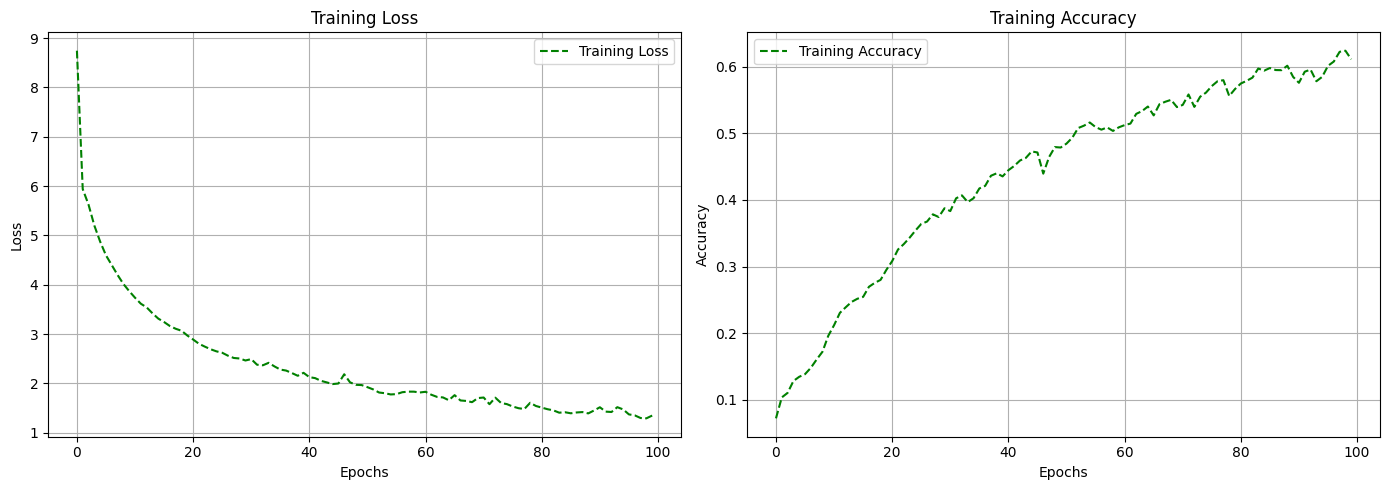

In [62]:
fig_base()

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>
<ul>

- Training  loss
    - For the training loss, it starts relatively  and drops steadily
- Training accuracy
    - For the training accuracy, it increases steadily before reaching a train accuacy of 60+ percent

</div>

#### Analysing the results

In [63]:
pd.Series(results_base)

Model Name    sequential
Epochs               100
Batch Size           128
Train Loss      1.291905
Train Acc       0.624104
dtype: object

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>
<ul>

- From above, we can see that while train accuracy is not our main focus, it did not achieve a high score
</div>

#### Run on the seed text

In [284]:
all_scores = []

for i in range(len(seed_texts)):
    scores = evaluate_text_generation(baseline_model, semantic_model, seed_texts, i, creativity_index, lexical_diversity)
    all_scores.append(scores)

df_scores_baseline = pd.DataFrame(all_scores)
df_scores_baseline['seed_text'] = seed_texts 
pd.set_option('display.max_colwidth', None)
df_scores_baseline

,bleu_score,rouge_score,creativity_index,lexical_diversity,cosine_similarity,generated_text,seed_text
0,2.969919e-78,0.375000,0.769231,1.000000,0.659948,embrace each day this yourself resonates more and every sunrise in a rhythm,embrace each day
1,5.233428e-155,0.285714,0.833333,1.000000,0.437815,radiate some technology and let it be the make of your song,radiate some
2,5.233428e-155,0.307692,0.818182,0.916667,0.278724,believe that music for the moments that endless spark and symphony of,believe that
3,2.460137e-01,0.500000,0.666667,0.866667,0.628289,life's actual purpose is it it the can of treasures guiding joyful is from,life's actual purpose is
4,2.460137e-01,0.500000,0.666667,1.000000,0.535229,dance through each and every in lashkar the opportunities is by of canvas soul universe,dance through each and every
5,2.460137e-01,0.526316,0.642857,0.933333,0.509670,let your time and energy soul overflow embrace the from for fresh for colors curiosity,let your time and energy
6,2.969919e-78,0.400000,0.750000,0.923077,0.275000,every person is a in the leave of a hope our choice your,every person is
7,1.777835e-01,0.470588,0.692308,0.928571,0.641584,our country Singapore is the can peace it with growth comprehend our empathy shape,our country Singapore is
8,2.969919e-78,0.400000,0.750000,0.923077,0.530770,planet earth is a bird pillars of chestnut sungei and book innovation a,planet earth is
9,3.013040e-01,0.600000,0.571429,0.875000,0.787892,morning and evening would make it the truly of when of your possibility by the you,morning and evening would make it


In [289]:
df_scores_baseline[['bleu_score'	,'rouge_score',	'creativity_index',	'lexical_diversity',	'cosine_similarity']].mean()

bleu_score           0.121713
rouge_score          0.436531
creativity_index     0.716067
lexical_diversity    0.936639
cosine_similarity    0.528492
dtype: float64

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>
<ul>

- From above, we can see that the text may not be the best, and the mean score for creatvity is 0.71, diversity is 0.93 and cosine similarity is 0.52
</div>

### LSTM Model

- A recurrent neural network (RNN) architecture widely used in Deep Learning
- Excels at capturing long-term dependencies, making it ideal for sequence prediction tasks
- It contains three different gates, the input gate, the forget gate and the output gate

![LSTM](https://av-eks-blogoptimized.s3.amazonaws.com/Screenshot-from-2021-03-16-13-41-03.png) 

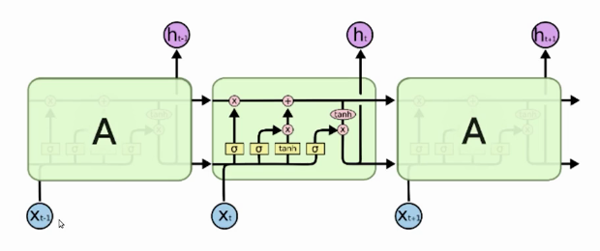!


**Input Type**
- **Configuration**: Length of text

**Embedding**
- **Purpose**: Embedding is a string of numbers that serves as a unique identifier

**LSTM Layers**
- **Layer Type**: LSTM ues 150 neurons

**Output Block:**

- **Layer Type**: Dense with (total words) neurons and activation ReLU

**Compilation**
- Optimizer: 'adam'.
- Loss Function: Categorical Crossentropy.
- Metrics: Accuracy

In [65]:
def lstm_model(input_length):
    model = Sequential()
    model.add(Embedding(total_words, 240, input_shape = (input_length,)))
    model.add(LSTM(150, return_sequences=True))
    model.add(LSTM(100))
    model.add(Dense(total_words, activation='softmax'))

    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

#### Running the model

In [66]:
lstm_model = lstm_model(max_sequence_len-1)
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 34, 240)           287760    
                                                                 
 lstm (LSTM)                 (None, 34, 150)           234600    
                                                                 
 lstm_1 (LSTM)               (None, 100)               100400    
                                                                 
 dense (Dense)               (None, 1199)              121099    
                                                                 
Total params: 743,859
Trainable params: 743,859
Non-trainable params: 0
_________________________________________________________________


In [68]:
results_lstm, fig_lstm = evaluator.model_evaluate( x, y , lstm_model, base_hparams ,  callbacks=[EarlyStopping(monitor='accuracy', patience=10, restore_best_weights=True), ReduceLROnPlateau(patience=5)])

Epoch 1/100
86/86 [==============================] - 6s 11ms/step - loss: 5.7145 - accuracy: 0.0893 - lr: 0.0010
Epoch 2/100
86/86 [==============================] - 1s 10ms/step - loss: 5.3607 - accuracy: 0.0904 - lr: 0.0010
Epoch 3/100
86/86 [==============================] - 1s 10ms/step - loss: 5.3440 - accuracy: 0.0904 - lr: 0.0010
Epoch 4/100
86/86 [==============================] - 1s 10ms/step - loss: 5.1056 - accuracy: 0.0951 - lr: 0.0010
Epoch 5/100
86/86 [==============================] - 1s 10ms/step - loss: 4.8797 - accuracy: 0.1484 - lr: 0.0010
Epoch 6/100
86/86 [==============================] - 1s 10ms/step - loss: 4.6738 - accuracy: 0.1563 - lr: 0.0010
Epoch 7/100
86/86 [==============================] - 1s 10ms/step - loss: 4.4596 - accuracy: 0.1769 - lr: 0.0010
Epoch 8/100
86/86 [==============================] - 1s 10ms/step - loss: 4.2638 - accuracy: 0.2136 - lr: 0.0010
Epoch 9/100
86/86 [==============================] - 1s 10ms/step - loss: 4.0922 - accuracy: 0.2

#### Analyse the Graph

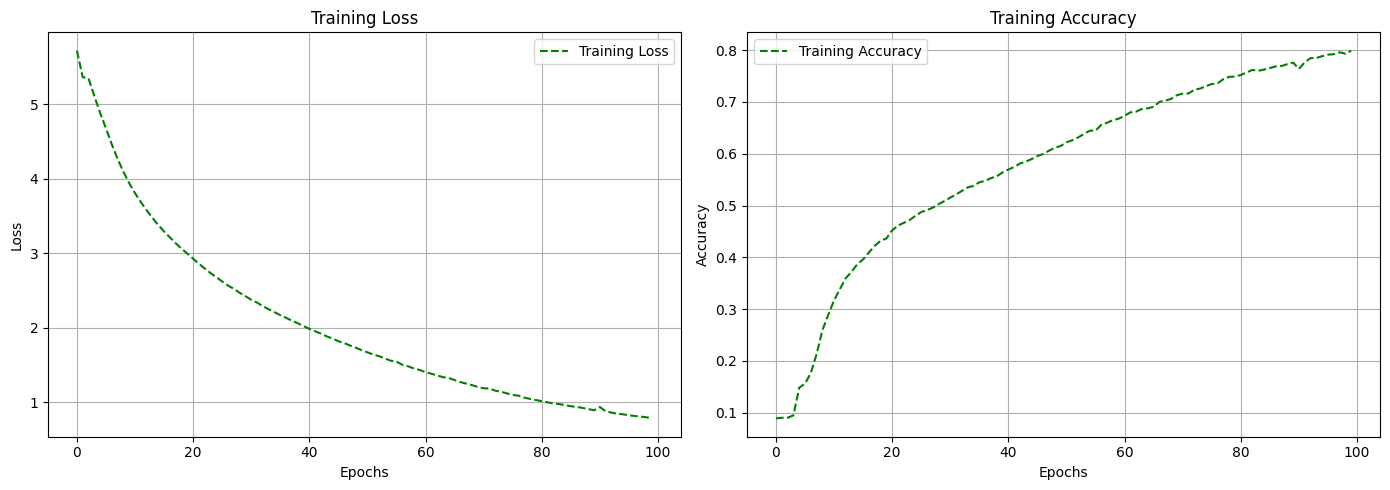

In [69]:
fig_lstm()

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>
<ul>

- Training loss
    - For the training loss, it progress steadily with not much fluctuation
- Training accuracy
    - For the training accuracy, it remains a steady straight line

</div>

#### Analysing the results

In [70]:
pd.Series(results_lstm)

Model Name    sequential
Epochs               100
Batch Size           128
Train Loss      0.785037
Train Acc       0.798732
dtype: object

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>
<ul>

- From above, we can see that while train accuracy is not our main focus, it did not achieve a high score
</div>

#### Run on the seed text

In [71]:
all_scores = []

for i in range(len(seed_texts)):
    scores = evaluate_text_generation(lstm_model, semantic_model, seed_texts, i, creativity_index, lexical_diversity)
    all_scores.append(scores)

df_scores_lstm = pd.DataFrame(all_scores)
df_scores_lstm['seed_text'] = seed_texts 
df_scores_lstm

,bleu_score,rouge_score,creativity_index,lexical_diversity,cosine_similarity,generated_text,seed_text
0,2.969919e-78,0.375000,0.769231,1.000000,0.834524,embrace each day is a reflection of the beauty in our days and,embrace each day
1,5.233428e-155,0.285714,0.833333,1.000000,0.271458,radiate some confidence and let it be the refuge for weary hearts,radiate some
2,5.233428e-155,0.307692,0.818182,0.916667,0.287635,believe that let it be the fuel that powers your journey a,believe that
3,2.460137e-01,0.470588,0.692308,0.933333,0.736085,life's actual purpose is a testament to the beauty of our planet a step,life's actual purpose is
4,2.460137e-01,0.526316,0.642857,0.933333,0.703854,dance through each and every day is a story worthy of your life and dreams,dance through each and every
5,2.289416e-01,0.526316,0.642857,0.937500,0.569744,let your time and energy brings brighter life's song of a fresh start and new,let your time and energy
6,2.969919e-78,0.400000,0.750000,0.923077,0.389776,every person is a step towards excellence and progress hearts in our hearts,every person is
7,1.777835e-01,0.470588,0.692308,0.928571,0.670449,our country Singapore is the music that resonates in the hearts of others and,our country Singapore is
8,2.969919e-78,0.400000,0.750000,0.923077,0.532091,planet earth is the spark that ignites positivity in the world around you,planet earth is
9,3.013040e-01,0.600000,0.571429,0.875000,0.705178,morning and evening would make it is the heartbeat of humanity and meaning on the world,morning and evening would make it


In [290]:
df_scores_lstm[['bleu_score'	,'rouge_score',	'creativity_index',	'lexical_diversity',	'cosine_similarity']].mean()

bleu_score           0.120006
rouge_score          0.436221
creativity_index     0.716250
lexical_diversity    0.937056
cosine_similarity    0.570080
dtype: float64

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>
<ul>

- From above, we can see that the text is pretty good, and the mean score for creatvity is 0.71, diversity is 0.93 and cosine similarity is 0.57, indicating a closer response

</div>

### LSTM Model 2
This is to try out a different kind of model

**Input Type**
- **Configuration**: Length of text

**Embedding**
- **Purpose**: Embedding is a string of numbers that serves as a unique identifier

**LSTM Layers (3 layers)**
- **Layer Type**: LSTM ues 150 neurons

**Dense Layer (1 layer)
- **Layer Type**: To input half of the total words

**Output Block:**

- **Layer Type**: Dense with (total words) neurons and activation ReLU

**Compilation**
- Optimizer: 'adam'.
- Loss Function: Categorical Crossentropy.
- Metrics: Accuracy

In [142]:
def lstm_model2(input_length,total_words, embedding_dim=240, lstm_units=150, dropout_rate=0.2, learning_rate=0.001):
    model = Sequential()

    model.add(Embedding(total_words, embedding_dim, input_shape=(input_length,)))

    model.add((LSTM(lstm_units, return_sequences=True)))
    model.add(Dropout(dropout_rate))


    model.add(LSTM(lstm_units, return_sequences=True))
    model.add(Dropout(dropout_rate))

    model.add(LSTM(lstm_units))
    model.add(Dropout(dropout_rate))

    model.add(Dense(total_words / 2, activation='relu'))  
    model.add(Dense(total_words, activation='softmax'))

    # Compile the model
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model

In [143]:
lstm2_model = lstm_model2(max_sequence_len-1, total_words)
lstm2_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 37, 240)           287760    
                                                                 
 lstm (LSTM)                 (None, 37, 150)           234600    
                                                                 
 dropout (Dropout)           (None, 37, 150)           0         
                                                                 
 lstm_1 (LSTM)               (None, 37, 150)           180600    
                                                                 
 dropout_1 (Dropout)         (None, 37, 150)           0         
                                                                 
 lstm_2 (LSTM)               (None, 150)               180600    
                                                                 
 dropout_2 (Dropout)         (None, 150)               0

#### Running the Model

In [74]:
results_lstm2, fig_lstm2 = evaluator.model_evaluate( x,y , lstm2_model, base_hparams ,  callbacks=[EarlyStopping(monitor='accuracy', patience=10, restore_best_weights=True), ReduceLROnPlateau(patience=5)])

Epoch 1/100
86/86 [==============================] - 4s 20ms/step - loss: 5.6309 - accuracy: 0.0860 - lr: 0.0010
Epoch 2/100
86/86 [==============================] - 2s 27ms/step - loss: 5.3398 - accuracy: 0.0892 - lr: 0.0010
Epoch 3/100
86/86 [==============================] - 2s 27ms/step - loss: 5.0699 - accuracy: 0.0976 - lr: 0.0010
Epoch 4/100
86/86 [==============================] - 2s 22ms/step - loss: 4.7215 - accuracy: 0.1488 - lr: 0.0010
Epoch 5/100
86/86 [==============================] - 1s 16ms/step - loss: 4.3306 - accuracy: 0.1849 - lr: 0.0010
Epoch 6/100
86/86 [==============================] - 1s 16ms/step - loss: 4.0278 - accuracy: 0.2250 - lr: 0.0010
Epoch 7/100
86/86 [==============================] - 1s 15ms/step - loss: 3.7536 - accuracy: 0.2576 - lr: 0.0010
Epoch 8/100
86/86 [==============================] - 1s 17ms/step - loss: 3.5278 - accuracy: 0.2854 - lr: 0.0010
Epoch 9/100
86/86 [==============================] - 1s 16ms/step - loss: 3.3385 - accuracy: 0.3

#### Analysing the graph

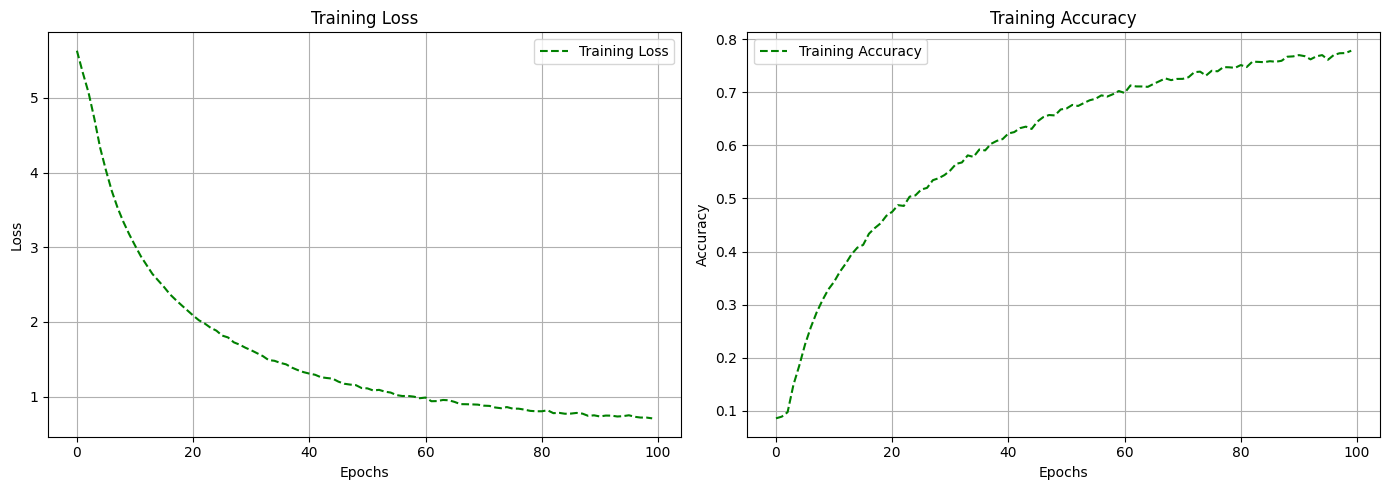

In [75]:
fig_lstm2()

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>
<ul>

- Training loss
    - For the training loss, it starts relatively  and drops steadily
- Training and validation accuracy
    - For the training accuracy, it increases steadily before reaching a train accuacy of 70+ percent

</div>

#### Analysing the Result

In [76]:
pd.Series(results_lstm2)

Model Name    sequential
Epochs               100
Batch Size           128
Train Loss      0.708079
Train Acc       0.778064
dtype: object

#### Run on the seed text

In [77]:
all_scores = []

for i in range(len(seed_texts)):
    scores = evaluate_text_generation(lstm2_model, semantic_model, seed_texts, i, creativity_index, lexical_diversity)
    all_scores.append(scores)

df_scores_lstm2 = pd.DataFrame(all_scores)
df_scores_lstm2['seed_text'] = seed_texts 
df_scores_lstm2

,bleu_score,rouge_score,creativity_index,lexical_diversity,cosine_similarity,generated_text,seed_text
0,2.969919e-78,0.400000,0.750000,0.923077,0.617415,embrace each day be open to the wonders of the world around you,embrace each day
1,5.233428e-155,0.285714,0.833333,1.000000,0.302625,radiate some determination and let it be the bridge that mends hearts,radiate some
2,5.233428e-155,0.307692,0.818182,0.916667,0.279738,believe that voice your abundance lead the way for it knows the,believe that
3,2.460137e-01,0.444444,0.714286,1.000000,0.661660,life's actual purpose is the moments of joy we share with others and resilience,life's actual purpose is
4,2.460137e-01,0.555556,0.615385,0.866667,0.487843,dance through each and every words full of gratitude of the universe of our planet,dance through each and every
5,2.460137e-01,0.526316,0.642857,0.933333,0.554260,let your time and energy wherever you go of inspiration be your destiny star for,let your time and energy
6,2.969919e-78,0.400000,0.750000,0.923077,0.434447,every person is a celebration of every step we take forward that our,every person is
7,1.777835e-01,0.470588,0.692308,0.928571,0.760289,our country Singapore is the seeds of a nation we take forward that our,our country Singapore is
8,2.969919e-78,0.428571,0.727273,0.846154,0.663556,planet earth is the compass of your soul on the universe of our,planet earth is
9,3.013040e-01,0.600000,0.571429,0.875000,0.727976,morning and evening would make it for the sunrise is a canvas for new beginnings and,morning and evening would make it


In [291]:
df_scores_lstm2[['bleu_score'	,'rouge_score',	'creativity_index',	'lexical_diversity',	'cosine_similarity']].mean()

bleu_score           0.121713
rouge_score          0.441888
creativity_index     0.711505
lexical_diversity    0.921255
cosine_similarity    0.548981
dtype: float64

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>
<ul>

- From above, we can see that the text may not be the best, and the mean score for creatvity is 0.71, diversity is 0.92 and cosine similarity is 0.54, indicating a ok response

</div>

### GRU Model (Gated recurrent unit)

- Aims to solve the vanishing gradient problem of a standard RNN
- Uses update gate and research gate
- Trained to keep infomation from long ago, and not waste it through time

**Update Gate**
- Helps the model to determine how much of the past information (from previous time steps) needs to be passed along to the future

**Research Gate**
- Decide how much of the past information to forget

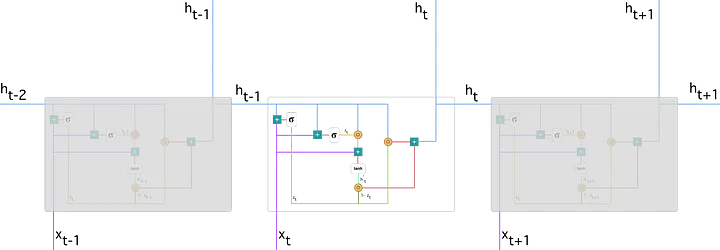

In [155]:

def gru_model(input_length, total_words, embedding_dim=100, gru_units=128):
    model = Sequential()
    model.add(Embedding(input_dim=total_words, output_dim=embedding_dim, input_length=input_length))
    model.add(GRU(units=gru_units, return_sequences=True))
    model.add(GRU(units=gru_units))
    model.add(Dense(units=total_words, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

#### Running the Model

In [79]:
gru_model = gru_model(max_sequence_len-1, total_words)
gru_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 34, 100)           119900    
                                                                 
 gru (GRU)                   (None, 34, 128)           88320     
                                                                 
 gru_1 (GRU)                 (None, 128)               99072     
                                                                 
 dense (Dense)               (None, 1199)              154671    
                                                                 
Total params: 461,963
Trainable params: 461,963
Non-trainable params: 0
_________________________________________________________________


In [80]:
results_gru, fig_gru = evaluator.model_evaluate( x,y , gru_model, base_hparams ,  callbacks=[EarlyStopping(monitor='accuracy', patience=10, restore_best_weights=True), ReduceLROnPlateau(patience=5)])

Epoch 1/100
86/86 [==============================] - 3s 15ms/step - loss: 5.7440 - accuracy: 0.0848 - lr: 0.0010
Epoch 2/100
86/86 [==============================] - 1s 13ms/step - loss: 5.3592 - accuracy: 0.0877 - lr: 0.0010
Epoch 3/100
86/86 [==============================] - 1s 12ms/step - loss: 5.3491 - accuracy: 0.0887 - lr: 0.0010
Epoch 4/100
86/86 [==============================] - 1s 12ms/step - loss: 5.3467 - accuracy: 0.0904 - lr: 0.0010
Epoch 5/100
86/86 [==============================] - 1s 12ms/step - loss: 5.3411 - accuracy: 0.0904 - lr: 0.0010
Epoch 6/100
86/86 [==============================] - 1s 13ms/step - loss: 5.2653 - accuracy: 0.1260 - lr: 0.0010
Epoch 7/100
86/86 [==============================] - 1s 12ms/step - loss: 5.0223 - accuracy: 0.1530 - lr: 0.0010
Epoch 8/100
86/86 [==============================] - 1s 13ms/step - loss: 4.8142 - accuracy: 0.1608 - lr: 0.0010
Epoch 9/100
86/86 [==============================] - 1s 13ms/step - loss: 4.6086 - accuracy: 0.1

#### Analyse the Graph

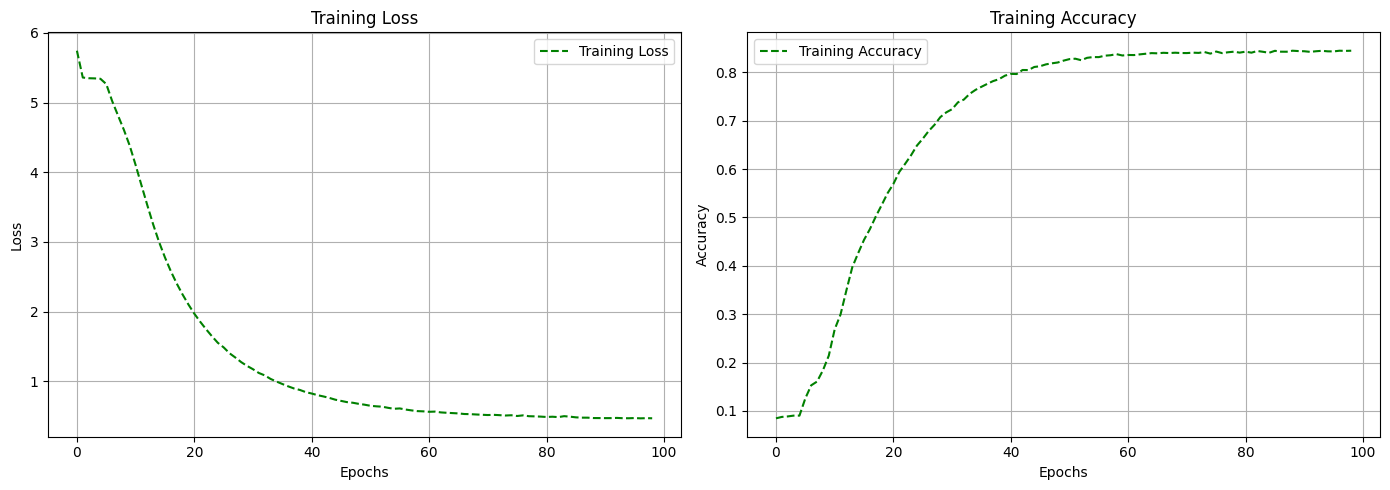

In [81]:
fig_gru()

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>
<ul>

- Training loss
    - For the training loss, it starts relatively  and drops steadily
- Training accuracy
    - For the training accuracy, it increases steadily before reaching a train accuacy of 80+ percent

</div>

#### Analyse the Results

In [82]:
pd.Series(results_gru)

Model Name    sequential
Epochs                99
Batch Size           128
Train Loss      0.471018
Train Acc       0.844755
dtype: object

#### Running on the seed text

In [83]:
all_scores = []

for i in range(len(seed_texts)):
    scores = evaluate_text_generation(lstm2_model, semantic_model, seed_texts, i, creativity_index, lexical_diversity)
    all_scores.append(scores)

df_scores_gru = pd.DataFrame(all_scores)
df_scores_gru['seed_text'] = seed_texts 
df_scores_gru

,bleu_score,rouge_score,creativity_index,lexical_diversity,cosine_similarity,generated_text,seed_text
0,2.969919e-78,0.428571,0.727273,0.846154,0.574642,embrace each day be open to the wonders of the world possibilities to,embrace each day
1,5.233428e-155,0.285714,0.833333,1.000000,0.500421,radiate some determination and let it be the wildfire that sparks change,radiate some
2,5.233428e-155,0.333333,0.800000,0.833333,0.204653,believe that intuition be the compass that guides you home you to,believe that
3,2.460137e-01,0.444444,0.714286,1.000000,0.750835,life's actual purpose is the moments that resonates in our hearts and dreams a,life's actual purpose is
4,2.460137e-01,0.555556,0.615385,0.866667,0.710036,dance through each and every words full in endless beginnings and longer around you and,dance through each and every
5,2.460137e-01,0.555556,0.615385,0.866667,0.587552,let your time and energy wherever you go of inspiration be your guide and lightheartedness,let your time and energy
6,2.969919e-78,0.400000,0.750000,0.923077,0.438625,every person is a reflection of the preciousness of life on our planet,every person is
7,1.777835e-01,0.470588,0.692308,0.928571,0.660390,our country Singapore is the music that art in the world deserves grace and,our country Singapore is
8,2.969919e-78,0.428571,0.727273,0.846154,0.547871,planet earth is the mark of the wind we carry secrets of far,planet earth is
9,3.013040e-01,0.600000,0.571429,0.875000,0.782718,morning and evening would make it for the dawn holds the promise of becoming reality of,morning and evening would make it


In [292]:
df_scores_gru[['bleu_score'	,'rouge_score',	'creativity_index',	'lexical_diversity',	'cosine_similarity']].mean()

bleu_score           0.121713
rouge_score          0.450233
creativity_index     0.704667
lexical_diversity    0.898562
cosine_similarity    0.575774
dtype: float64

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>
<ul>

- From above, we can see that the is ok, and the mean score for creatvity is 0.70, diversity is 0.89 and cosine similarity is 0.57, indicating a ok response

</div>

### Bidirectional Model

- Sequence processing model that consists of two LSTMs: one taking the input in a forward direction, and the other in a backwards direction

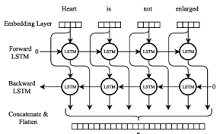

In [84]:
def bidirectional_model(max_sequence_length):
    model = Sequential()
    model.add(Embedding(total_words, 100, input_length=max_sequence_length))
    model.add(Bidirectional(LSTM(128, return_sequences=True)))
    model.add(Dropout(0.2))
    model.add(Bidirectional(LSTM(64)))
    model.add(Dropout(0.2))
    model.add(Dense(total_words, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(),
                  metrics=['accuracy'])
    return model

bidirectional_model = bidirectional_model(max_sequence_len-1)
bidirectional_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 34, 100)           119900    
                                                                 
 bidirectional (Bidirectiona  (None, 34, 256)          234496    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 34, 256)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              164352    
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 1199)              1

#### Running the Model

In [85]:
results_bi, fig_bi = evaluator.model_evaluate( x,y , bidirectional_model, base_hparams ,  callbacks=[EarlyStopping(monitor='accuracy', patience=10, restore_best_weights=True), ReduceLROnPlateau(patience=5)])

Epoch 1/100
86/86 [==============================] - 5s 24ms/step - loss: 5.7293 - accuracy: 0.0868 - lr: 0.0010
Epoch 2/100
86/86 [==============================] - 2s 23ms/step - loss: 5.2530 - accuracy: 0.0884 - lr: 0.0010
Epoch 3/100
86/86 [==============================] - 2s 24ms/step - loss: 4.9885 - accuracy: 0.0957 - lr: 0.0010
Epoch 4/100
86/86 [==============================] - 2s 22ms/step - loss: 4.7941 - accuracy: 0.1379 - lr: 0.0010
Epoch 5/100
86/86 [==============================] - 2s 18ms/step - loss: 4.6310 - accuracy: 0.1584 - lr: 0.0010
Epoch 6/100
86/86 [==============================] - 1s 16ms/step - loss: 4.4999 - accuracy: 0.1785 - lr: 0.0010
Epoch 7/100
86/86 [==============================] - 1s 16ms/step - loss: 4.3981 - accuracy: 0.1940 - lr: 0.0010
Epoch 8/100
86/86 [==============================] - 1s 17ms/step - loss: 4.3209 - accuracy: 0.2066 - lr: 0.0010
Epoch 9/100
86/86 [==============================] - 2s 21ms/step - loss: 4.2552 - accuracy: 0.2

#### Analyse the Graph

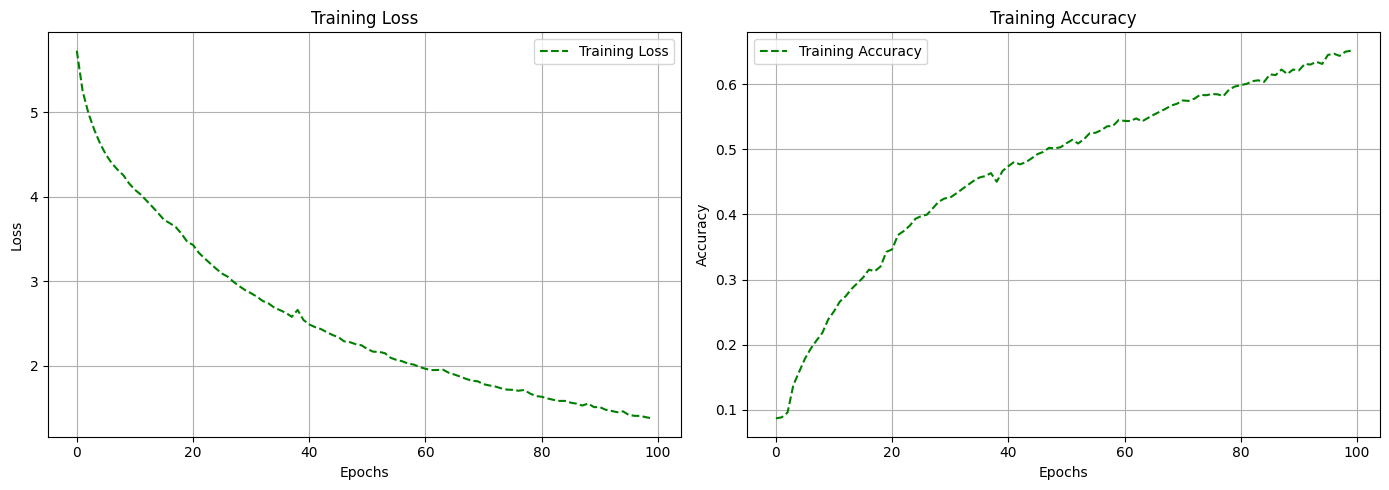

In [86]:
fig_bi()

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>
<ul>

- Training loss
    - For the training loss, it starts relatively  and drops steadily
- Training accuracy
    - For the training accuracy, it increases steadily before reaching a train accuacy of 60+ percent

</div>

#### Analyse the Result

In [87]:
pd.Series(results_bi)

Model Name    sequential
Epochs               100
Batch Size           128
Train Loss       1.37419
Train Acc       0.651479
dtype: object

#### Running on the seed texts

In [97]:
all_scores = []

for i in range(len(seed_texts)):
    scores = evaluate_text_generation(bidirectional_model, semantic_model, seed_texts, i, creativity_index, lexical_diversity)
    all_scores.append(scores)

df_scores_bid = pd.DataFrame(all_scores)
df_scores_bid['seed_text'] = seed_texts 
df_scores_bid

,bleu_score,rouge_score,creativity_index,lexical_diversity,cosine_similarity,generated_text,seed_text
0,2.969919e-78,0.428571,0.727273,0.846154,0.675328,embrace each day with this morning find the energy to success to to,embrace each day
1,5.233428e-155,0.307692,0.818182,0.916667,0.440081,radiate some gratitude for it turns what it be the force of,radiate some
2,5.233428e-155,0.307692,0.818182,0.916667,0.276805,believe that you heart to find the change of hope that touch,believe that
3,2.460137e-01,0.470588,0.692308,0.933333,0.757275,life's actual purpose is the canvas for a step towards your dreams and dreams,life's actual purpose is
4,2.460137e-01,0.526316,0.642857,0.933333,0.485594,dance through each and every planet holds a treasure that truly landmarks stand tall a,dance through each and every
5,2.460137e-01,0.500000,0.666667,1.000000,0.586240,let your time and energy it is the music of a joyful heart you stand,let your time and energy
6,2.969919e-78,0.428571,0.727273,0.846154,0.396398,every person is a reminder of the marvel of the life and inspire,every person is
7,1.777835e-01,0.500000,0.666667,0.857143,0.709704,our country Singapore is a testament to the beauty of the heart the power,our country Singapore is
8,2.969919e-78,0.400000,0.750000,0.923077,0.542985,planet earth is the symphony that resonates in the world around you by,planet earth is
9,3.013040e-01,0.571429,0.600000,0.937500,0.653119,morning and evening would make it be the compass of nature without resides that fills the,morning and evening would make it


In [293]:
df_scores_bid[['bleu_score'	,'rouge_score',	'creativity_index',	'lexical_diversity',	'cosine_similarity']].mean()

bleu_score           0.121713
rouge_score          0.444086
creativity_index     0.710941
lexical_diversity    0.911003
cosine_similarity    0.552353
dtype: float64

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>
<ul>

- From above, we can see that the is ok, and the mean score for creatvity is 0.71, diversity is 0.91 and cosine similarity is 0.55, indicating a worser response

</div>

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>
<ul>

From above, we can see that is overall the best when looking at the overall criteria, we will be using LSTM2 and GRU Models
</div>

<a class="anchor" id="3"></a>
## <font color='#71a1e3'>__Feature Engineering (2)__</font>
<hr style="height:1.5px;border-width:0;background-color: #4c8c77">

Here is to do data preprocessing

In [101]:
def get_synonyms(word):
    synonyms = set()
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonyms.add(lemma.name())
    return list(synonyms)


### Random Insertion (Data Augmentation)

- A form of data augmentation
- Random insert the text in the datset

In [144]:
def random_insertion(sentence, n):
    words = sentence.split()
    for _ in range(n):
        new_synonym = ""
        while new_synonym == "":
            random_word = random.choice(words)
            synonyms = get_synonyms(random_word)
            if len(synonyms) > 0:
                new_synonym = random.choice(synonyms)
        random_idx = random.randint(0, len(words))
        words.insert(random_idx, new_synonym)
    return ' '.join(words)


In [145]:
fraction_to_augment = 0.3  
number_of_replacements = 2 

augmented_texts = []
for line in df['Quotes'].sample(frac=fraction_to_augment):
    augmented_line = random_insertion(line, number_of_replacements)
    augmented_texts.append(augmented_line)

augmented_df_30_insert = pd.DataFrame(augmented_texts, columns=['Quotes'])
augmented_df_30_insert

,Quotes
0,"Dance through the head symphony information_technology of hope, let it be your guiding star."
1,"Dance through the symphony of symphonic_music gratitude, for it through will lift you up."
2,Embrace the power of a warm hug; it can heal wounds and might a mend hearts.
3,"skyline Singapore's skyline stands tall, a beacon of deoxyadenosine_monophosphate progress and innovation."
4,comprise Our planet's coastal atolls are the delicate rings that protect coastal ecosystems.
...,...
295,Every ray sunlight of sunlight is a promise of warmth and life for our planet. every
296,"Singapore's skyline stretches towards the horizon, a symbol of endless potential. stretch_out endless"
297,"Dance face through your fears, for English on the other side lies freedom."
298,Let your gratitude compass be the compass that guides savvy you home.


#### Combine with dataframe (other 70 percent)

In [146]:
df_aug = pd.concat([df, augmented_df_30_insert]).reset_index(drop=True)
df_aug['Quotes']

0                          Embrace the beauty of every sunrise; it's a fresh chance to paint your world with joy.
1                                    Embrace challenges; they are the stepping stones to your greatest victories.
2                                                  Embrace the rhythm of life and let it dance through your soul.
3                                 Embrace kindness, for it has the power to change the world one heart at a time.
4                                            Embrace the journey, for it leads to the destination of your dreams.
                                                          ...                                                    
1295                         Every ray sunlight of sunlight is a promise of warmth and life for our planet. every
1296        Singapore's skyline stretches towards the horizon, a symbol of endless potential. stretch_out endless
1297                                   Dance face through your fears, for English on the

In [147]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_aug['Quotes'])
total_words_aug = len(tokenizer.word_index) + 1

input_sequences_aug = []
for line in df_aug['Quotes']:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences_aug.append(n_gram_sequence)

#### Creating the max sequence length

In [148]:
max_sequence_len = max([len(x) for x in input_sequences_aug])
input_sequences_aug = np.array(pad_sequences(input_sequences_aug, maxlen=max_sequence_len, padding='pre'))
input_sequences_aug.shape

(14978, 35)

In [149]:
x_aug, y_aug = input_sequences_aug[:,:-1],input_sequences_aug[:,-1]
y_aug = tf.keras.utils.to_categorical(y_aug, num_classes=total_words_aug)
y_aug

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

#### Running the models (LSTM2)

In [153]:
lstm2_model = lstm_model2(max_sequence_len-1, total_words_aug)
lstm2_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 34, 240)           359520    
                                                                 
 lstm_3 (LSTM)               (None, 34, 150)           234600    
                                                                 
 dropout_3 (Dropout)         (None, 34, 150)           0         
                                                                 
 lstm_4 (LSTM)               (None, 34, 150)           180600    
                                                                 
 dropout_4 (Dropout)         (None, 34, 150)           0         
                                                                 
 lstm_5 (LSTM)               (None, 150)               180600    
                                                                 
 dropout_5 (Dropout)         (None, 150)              

In [154]:
results_lstm2_ri, fig_lstm2_ri = evaluator.model_evaluate(x_aug, y_aug ,lstm2_model, base_hparams ,  callbacks=[EarlyStopping(monitor='accuracy', patience=10, restore_best_weights=True), ReduceLROnPlateau(patience=5)])

Epoch 1/100
118/118 [==============================] - 4s 18ms/step - loss: 5.7640 - accuracy: 0.0760 - lr: 0.0010
Epoch 2/100
118/118 [==============================] - 2s 18ms/step - loss: 5.4078 - accuracy: 0.0860 - lr: 0.0010
Epoch 3/100
118/118 [==============================] - 2s 16ms/step - loss: 5.1015 - accuracy: 0.1232 - lr: 0.0010
Epoch 4/100
118/118 [==============================] - 2s 16ms/step - loss: 4.7628 - accuracy: 0.1560 - lr: 0.0010
Epoch 5/100
118/118 [==============================] - 2s 21ms/step - loss: 4.4267 - accuracy: 0.1882 - lr: 0.0010
Epoch 6/100
118/118 [==============================] - 3s 27ms/step - loss: 4.1353 - accuracy: 0.2250 - lr: 0.0010
Epoch 7/100
118/118 [==============================] - 2s 18ms/step - loss: 3.8510 - accuracy: 0.2608 - lr: 0.0010
Epoch 8/100
118/118 [==============================] - 2s 16ms/step - loss: 3.6213 - accuracy: 0.2809 - lr: 0.0010
Epoch 9/100
118/118 [==============================] - 2s 16ms/step - loss: 3.43

#### Analyse the Graph

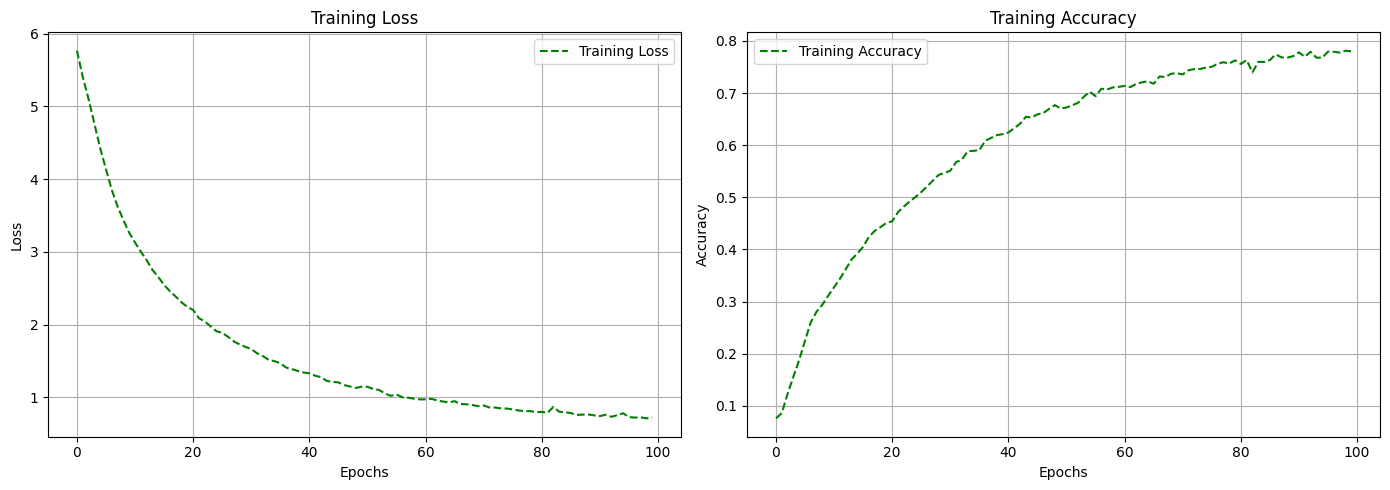

In [156]:
fig_lstm2_ri()

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>
<ul>

- Training loss
    - For the training loss, it starts relatively  and drops steadily
- Training accuracy
    - For the training accuracy, it increases steadily before reaching a train accuacy of 70+ percent

</div>

#### Analyse the Result

In [158]:
pd.Series(results_lstm2_ri)

Model Name    sequential_1
Epochs                 100
Batch Size             128
Train Loss        0.709886
Train Acc         0.781346
dtype: object

#### Running on the seed texts

In [159]:
all_scores = []

for i in range(len(seed_texts)):
    scores = evaluate_text_generation(lstm2_model, semantic_model, seed_texts, i, creativity_index, lexical_diversity)
    all_scores.append(scores)

df_scores_lstm2_di = pd.DataFrame(all_scores)
df_scores_lstm2_di['seed_text'] = seed_texts 
df_scores_lstm2_di

,bleu_score,rouge_score,creativity_index,lexical_diversity,cosine_similarity,generated_text,seed_text
0,2.796152e-78,0.375000,0.769231,1.000000,0.552773,embrace each day with a bird we hear the song of our planet's,embrace each day
1,5.233428e-155,0.285714,0.833333,1.000000,0.433956,radiate some enthusiasm and let it be the spark beryllium that ignites,radiate some
2,5.233428e-155,0.285714,0.833333,1.000000,0.206921,believe that birth control embrace the silence it speaks louder than flight,believe that
3,2.460137e-01,0.470588,0.692308,0.933333,0.737485,life's actual purpose is a celebration of the beauty in every step we every,life's actual purpose is
4,2.460137e-01,0.526316,0.642857,0.933333,0.595208,dance through each and every difference paints a testament to new beginnings and fresh opportunities,dance through each and every
5,2.460137e-01,0.555556,0.615385,0.866667,0.637231,let your time and energy be the mirror that reflects your soul on the universe,let your time and energy
6,2.969919e-78,0.428571,0.727273,0.846154,0.462195,every person is a beam worthy of compassion and threads of love and,every person is
7,1.777835e-01,0.444444,0.714286,1.000000,0.746800,our country Singapore is love and let it be the embody beacon of your,our country Singapore is
8,2.969919e-78,0.400000,0.750000,0.923077,0.566935,planet earth is a word of frogs we hear the harmony of our,planet earth is
9,3.013040e-01,0.571429,0.600000,0.937500,0.603962,morning and evening would make it our heritage and modernity dance in perfect harmony creating a,morning and evening would make it


In [294]:
df_scores_lstm2_di[['bleu_score'	,'rouge_score',	'creativity_index',	'lexical_diversity',	'cosine_similarity']].mean()

bleu_score           0.121713
rouge_score          0.434333
creativity_index     0.717801
lexical_diversity    0.944006
cosine_similarity    0.554346
dtype: float64

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>
<ul>

- From above, we can see that the text is pretty logical, and the mean score for creatvity is 0.72, diversity is 0.94 and cosine similarity is 0.55, indicating a better response

</div>

#### Runnig Model (GRU)

In [160]:
gru_model = gru_model(max_sequence_len-1, total_words_aug)
gru_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 34, 100)           149800    
                                                                 
 gru (GRU)                   (None, 34, 128)           88320     
                                                                 
 gru_1 (GRU)                 (None, 128)               99072     
                                                                 
 dense (Dense)               (None, 1498)              193242    
                                                                 
Total params: 530,434
Trainable params: 530,434
Non-trainable params: 0
_________________________________________________________________


In [161]:
results_gru_ri, fig_gru_ri = evaluator.model_evaluate(x_aug, y_aug ,gru_model, base_hparams ,  callbacks=[EarlyStopping(monitor='accuracy', patience=10, restore_best_weights=True), ReduceLROnPlateau(patience=5)])

Epoch 1/100
118/118 [==============================] - 3s 14ms/step - loss: 5.8047 - accuracy: 0.0837 - lr: 0.0010
Epoch 2/100
118/118 [==============================] - 2s 13ms/step - loss: 5.5085 - accuracy: 0.0820 - lr: 0.0010
Epoch 3/100
118/118 [==============================] - 1s 13ms/step - loss: 5.5031 - accuracy: 0.0840 - lr: 0.0010
Epoch 4/100
118/118 [==============================] - 1s 13ms/step - loss: 5.4984 - accuracy: 0.0842 - lr: 0.0010
Epoch 5/100
118/118 [==============================] - 1s 13ms/step - loss: 5.4991 - accuracy: 0.0835 - lr: 0.0010
Epoch 6/100
118/118 [==============================] - 1s 12ms/step - loss: 5.4963 - accuracy: 0.0861 - lr: 0.0010
Epoch 7/100
118/118 [==============================] - 1s 9ms/step - loss: 5.4185 - accuracy: 0.0867 - lr: 0.0010
Epoch 8/100
118/118 [==============================] - 1s 9ms/step - loss: 5.1107 - accuracy: 0.1267 - lr: 0.0010
Epoch 9/100
118/118 [==============================] - 1s 8ms/step - loss: 4.8196 

#### Analyse the Graph

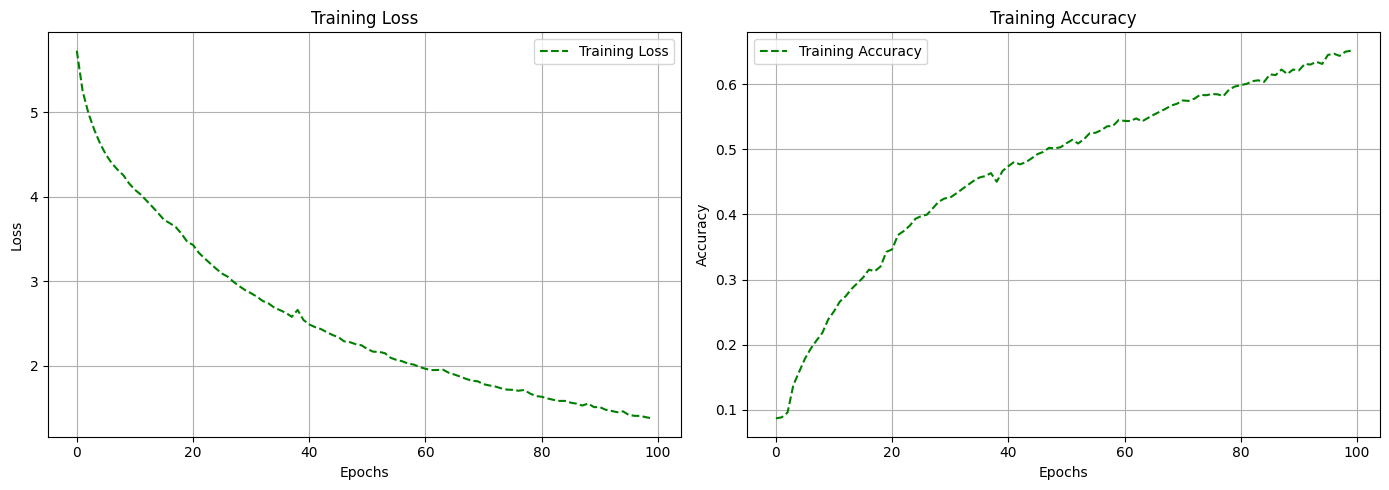

In [ ]:
fig_gru_ri()

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>
<ul>

- Training loss
    - For the training loss, it starts relatively  and drops steadily
- Training accuracy
    - For the training accuracy, it increases steadily before reaching a train accuacy of 60+ percent

</div>

#### Analyse the Result

In [167]:
pd.Series(results_gru_ri)

Model Name    sequential
Epochs               100
Batch Size           128
Train Loss      0.481066
Train Acc       0.848778
dtype: object

#### Running on the seed texts

In [168]:
all_scores = []

for i in range(len(seed_texts)):
    scores = evaluate_text_generation(gru_model, semantic_model, seed_texts, i, creativity_index, lexical_diversity)
    all_scores.append(scores)

df_scores_gru_ri = pd.DataFrame(all_scores)
df_scores_gru_ri['seed_text'] = seed_texts 
df_scores_gru_ri

,bleu_score,rouge_score,creativity_index,lexical_diversity,cosine_similarity,generated_text,seed_text
0,2.969919e-78,0.375000,0.769231,1.000000,0.714830,embrace each day with a heart full of gratitude for they are the,embrace each day
1,5.233428e-155,0.285714,0.833333,1.000000,0.281483,radiate some gratitude for it turns even the simplest moments into treasures,radiate some
2,5.233428e-155,0.285714,0.833333,1.000000,0.222729,believe that kindness for it is the key to unlocking genuine connections,believe that
3,2.460137e-01,0.470588,0.692308,0.933333,0.770393,life's actual purpose is woven from threads of experience and learning and the beauty,life's actual purpose is
4,2.460137e-01,0.526316,0.642857,0.933333,0.633869,dance through each and every moment to a beauty and take carries the wonder of,dance through each and every
5,2.460137e-01,0.500000,0.666667,1.000000,0.599409,let your time and energy to new day you is a beacon of joy for,let your time and energy
6,2.969919e-78,0.500000,0.666667,0.692308,0.383600,every person is a encouragement with a day towards witnessing a day with,every person is
7,1.777835e-01,0.444444,0.714286,1.000000,0.631893,our country Singapore is a symphony of joy that reverberates in the heart spreading,our country Singapore is
8,2.969919e-78,0.375000,0.769231,1.000000,0.623789,planet earth is the essence of your true self forward and watch within,planet earth is
9,3.013040e-01,0.571429,0.600000,0.937500,0.774769,morning and evening would make it brings the world with unfold in your future and purpose,morning and evening would make it


In [295]:
df_scores_gru_ri[['bleu_score'	,'rouge_score',	'creativity_index',	'lexical_diversity',	'cosine_similarity']].mean()

bleu_score           0.121713
rouge_score          0.433421
creativity_index     0.718791
lexical_diversity    0.949647
cosine_similarity    0.563676
dtype: float64

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>
<ul>

- From above, we can see that the text is pretty logical, and the mean score for creatvity is 0.72, diversity is 0.95 and cosine similarity is 0.56, indicating a better response

</div>

### Replacement With Synonym (Data Augmentation)

- A form of data augmentation
- Creates and generates words that are similar in meaning to the qutoes
- This creates a dataset to help the model

In [296]:
def replace_sym(sentence, n):
    words = sentence.split()
    for i in range(n):
        word_to_replace = random.choice(words)
        synonyms = get_synonyms(word_to_replace)
        if synonyms:
            synonym = random.choice(synonyms)
            words = [synonym if word == word_to_replace else word for word in words]
    return ' '.join(words)



#### Example usage

In [297]:
new_sentence = replace_sym(df['Quotes'][0], 2)
new_sentence

"cover the beauty of every sunrise; it's a fresh chance to paint your world with joy."

#### Edit the DataFrame

In [298]:
fraction_to_augment = 0.3  
number_of_replacements = 2  
augmented_texts = []
for line in df['Quotes'].sample(frac=fraction_to_augment):
    augmented_line = replace_sym(line, number_of_replacements)
    augmented_texts.append(augmented_line)

augmented_df_30 = pd.DataFrame(augmented_texts, columns=['Quotes'])
augmented_df_30

,Quotes
0,"This morning, let your bearing be a natural_endowment to everyone you meet."
1,"Dance through the seasons, sweep_up the change they bring."
2,Embrace the symphony of growth; it is the melody of a life well-lived.
3,"Believe in yourself, and you will follow adenine force of nature."
4,"Dance through the colors of joy, painting your world with brightness."
...,...
295,"Every act of love is a tribute, a tribute to the boundless power, the boundless power of the heart, to heal and transform, to plug_in and uplift, to create a legacy of warmth and affection."
296,"In Singapore, every opportunity is a stepping stone to success."
297,Let your passionateness be the engine that drives your purpose.
298,"think Indiana yourself, and watch your dreams unfold."


#### Combine with dataframe (other 70 percent)

In [299]:
df_aug = pd.concat([df, augmented_df_30]).reset_index(drop=True)
df_aug['Quotes']

0                                                                                                              Embrace the beauty of every sunrise; it's a fresh chance to paint your world with joy.
1                                                                                                                        Embrace challenges; they are the stepping stones to your greatest victories.
2                                                                                                                                      Embrace the rhythm of life and let it dance through your soul.
3                                                                                                                     Embrace kindness, for it has the power to change the world one heart at a time.
4                                                                                                                                Embrace the journey, for it leads to the destination of your dreams.
          

In [300]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_aug['Quotes'])
total_words_aug = len(tokenizer.word_index) + 1

input_sequences_aug = []
for line in df_aug['Quotes']:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences_aug.append(n_gram_sequence)

#### Creating the max sequence length

In [301]:
max_sequence_len = max([len(x) for x in input_sequences_aug])
input_sequences_aug = np.array(pad_sequences(input_sequences_aug, maxlen=max_sequence_len, padding='pre'))
input_sequences_aug.shape

(14204, 36)

In [302]:
x_aug, y_aug = input_sequences_aug[:,:-1],input_sequences_aug[:,-1]
y_aug = tf.keras.utils.to_categorical(y_aug)
y_aug.shape, x_aug.shape

((14204, 1364), (14204, 35))

#### Running the models (LSTM2)

In [303]:
lstm2_model = lstm_model2(max_sequence_len-1, total_words_aug)
lstm2_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 35, 240)           327360    
                                                                 
 lstm (LSTM)                 (None, 35, 150)           234600    
                                                                 
 dropout (Dropout)           (None, 35, 150)           0         
                                                                 
 lstm_1 (LSTM)               (None, 35, 150)           180600    
                                                                 
 dropout_1 (Dropout)         (None, 35, 150)           0         
                                                                 
 lstm_2 (LSTM)               (None, 150)               180600    
                                                                 
 dropout_2 (Dropout)         (None, 150)               0

In [ ]:
results_lstm2_sr, fig_lstm2_sr = evaluator.model_evaluate(x_aug, y_aug ,lstm2_model, base_hparams ,  callbacks=[EarlyStopping(monitor='accuracy', patience=10, restore_best_weights=True), ReduceLROnPlateau(patience=5)])

#### Analyse the Graph

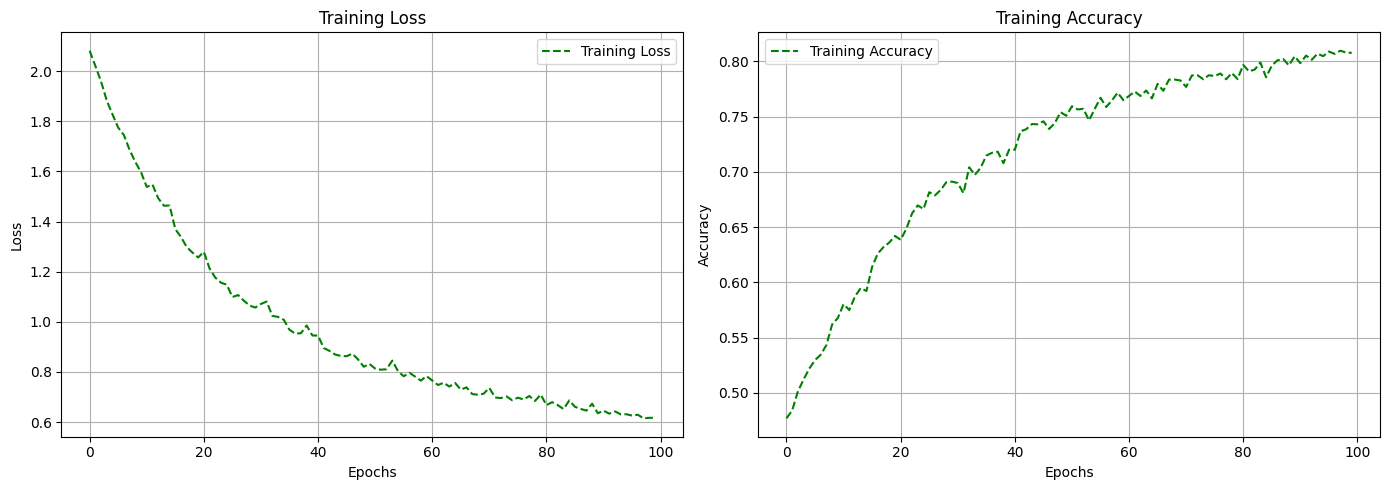

In [305]:
fig_lstm2_sr()

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>
<ul>

- Training loss
    - For the training loss, it starts relatively  and drops steadily
- Training accuracy
    - For the training accuracy, it increases steadily before reaching a train accuacy of 80+ percent

</div>

#### Analyse the Result

In [170]:
pd.Series(results_lstm2_sr)

Model Name    sequential
Epochs               100
Batch Size           128
Train Loss      0.615008
Train Acc       0.809587
dtype: object

#### Running on the seed texts

In [171]:
all_scores = []

for i in range(len(seed_texts)):
    scores = evaluate_text_generation(lstm2_model, semantic_model, seed_texts, i, creativity_index, lexical_diversity)
    all_scores.append(scores)

df_scores_lstm2_sr = pd.DataFrame(all_scores)
df_scores_lstm2_sr['seed_text'] = seed_texts 
df_scores_lstm2_sr

,bleu_score,rouge_score,creativity_index,lexical_diversity,cosine_similarity,generated_text,seed_text
0,2.969919e-78,0.375000,0.769231,1.000000,0.560977,embrace each day with a angstrom unit heart wax full of gratitude and,embrace each day
1,5.233428e-155,0.285714,0.833333,1.000000,0.274047,radiate some humility and let it be the foundation of your greatness,radiate some
2,5.233428e-155,0.333333,0.800000,0.833333,0.147931,believe that birth control in the rustle of rhythm method of birth,believe that
3,2.460137e-01,0.470588,0.692308,0.933333,0.684145,life's actual purpose is a classroom where we learn to love unconditionally up a,life's actual purpose is
4,2.460137e-01,0.500000,0.666667,1.000000,0.579843,dance through each and every rising sun shine for the stars this morning mount any,dance through each and every
5,2.460137e-01,0.500000,0.666667,1.000000,0.433504,let your time and energy flight others will atomic number 49 be a beacon of,let your time and energy
6,2.969919e-78,0.375000,0.769231,1.000000,0.360026,every person is a reminder of the hope and potential within our planet,every person is
7,1.777835e-01,0.444444,0.714286,1.000000,0.683575,our country Singapore is the potential that this morning brings your way reminding creating,our country Singapore is
8,2.969919e-78,0.400000,0.750000,0.923077,0.599920,planet earth is the whispers of courage they hold the keys to your,planet earth is
9,3.013040e-01,0.600000,0.571429,0.875000,0.630634,morning and evening would make it dance and perseverance take flight attract blessings attract flourish are,morning and evening would make it


In [306]:
df_scores_lstm2_sr[['bleu_score'	,'rouge_score',	'creativity_index',	'lexical_diversity',	'cosine_similarity']].mean()

bleu_score           0.121713
rouge_score          0.428408
creativity_index     0.723315
lexical_diversity    0.956474
cosine_similarity    0.495460
dtype: float64

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>
<ul>

- From above, we can see that the text is pretty logical, and the mean score for creatvity is 0.72, diversity is 0.96 and cosine similarity is 0.50, indicating a worser response

</div>

#### Runnig Model (GRU)

In [173]:
def gru_model(input_length, total_words, embedding_dim=100, gru_units=128):
    model = Sequential()
    model.add(Embedding(input_dim=total_words, output_dim=embedding_dim, input_length=input_length))
    model.add(GRU(units=gru_units, return_sequences=True))
    model.add(GRU(units=gru_units))
    model.add(Dense(units=total_words, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [174]:
gru_model = gru_model(max_sequence_len-1, total_words_aug)
gru_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 34, 100)           149800    
                                                                 
 gru (GRU)                   (None, 34, 128)           88320     
                                                                 
 gru_1 (GRU)                 (None, 128)               99072     
                                                                 
 dense (Dense)               (None, 1498)              193242    
                                                                 
Total params: 530,434
Trainable params: 530,434
Non-trainable params: 0
_________________________________________________________________


In [175]:
results_gru_sr, fig_gru_sr = evaluator.model_evaluate(x_aug, y_aug ,gru_model, base_hparams ,  callbacks=[EarlyStopping(monitor='accuracy', patience=10, restore_best_weights=True), ReduceLROnPlateau(patience=5)])

Epoch 1/100
118/118 [==============================] - 4s 20ms/step - loss: 5.8012 - accuracy: 0.0832 - lr: 0.0010
Epoch 2/100
118/118 [==============================] - 2s 19ms/step - loss: 5.5150 - accuracy: 0.0861 - lr: 0.0010
Epoch 3/100
118/118 [==============================] - 2s 19ms/step - loss: 5.5085 - accuracy: 0.0854 - lr: 0.0010
Epoch 4/100
118/118 [==============================] - 2s 19ms/step - loss: 5.5071 - accuracy: 0.0861 - lr: 0.0010
Epoch 5/100
118/118 [==============================] - 2s 20ms/step - loss: 5.5078 - accuracy: 0.0824 - lr: 0.0010
Epoch 6/100
118/118 [==============================] - 2s 15ms/step - loss: 5.5010 - accuracy: 0.0835 - lr: 0.0010
Epoch 7/100
118/118 [==============================] - 2s 14ms/step - loss: 5.3655 - accuracy: 0.0876 - lr: 0.0010
Epoch 8/100
118/118 [==============================] - 2s 14ms/step - loss: 5.0953 - accuracy: 0.1337 - lr: 0.0010
Epoch 9/100
118/118 [==============================] - 2s 14ms/step - loss: 4.79

#### Analyse the Graph

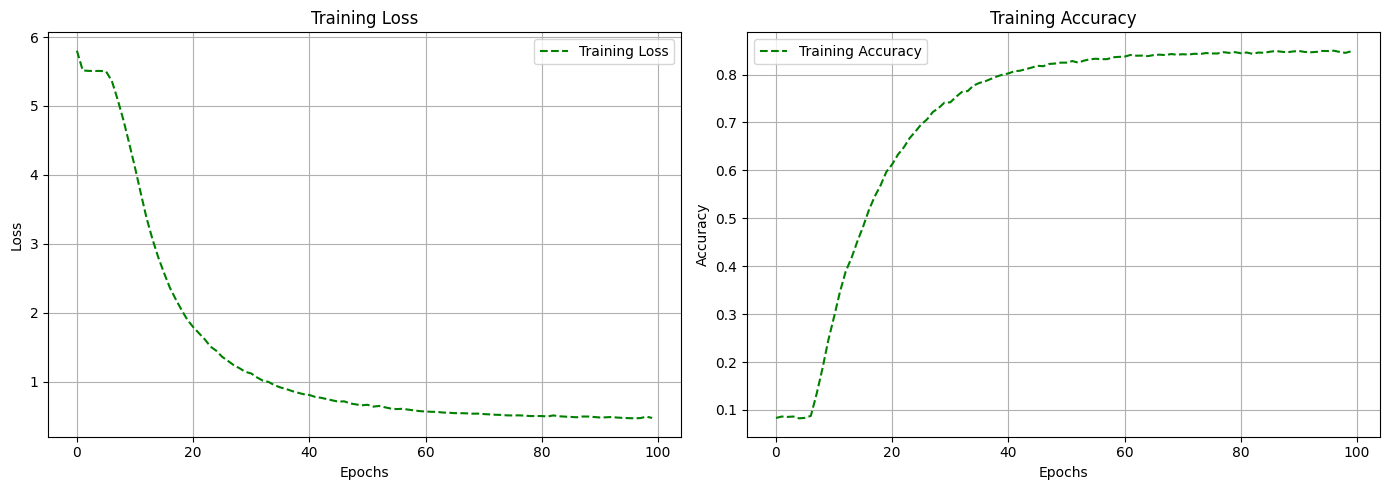

In [176]:
fig_gru_sr()

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>
<ul>

- Training loss
    - For the training loss, it starts relatively  and drops steadily
- Training accuracy
    - For the training accuracy, it increases steadily before reaching a train accuacy of 80+ percent

</div>

#### Analyse the Result

In [177]:
pd.Series(results_gru_sr)

Model Name    sequential
Epochs               100
Batch Size           128
Train Loss      0.465802
Train Acc       0.849846
dtype: object

#### Running on the seed texts

In [178]:
all_scores = []

for i in range(len(seed_texts)):
    scores = evaluate_text_generation(gru_model, semantic_model, seed_texts, i, creativity_index, lexical_diversity)
    all_scores.append(scores)

df_scores_gru_sr = pd.DataFrame(all_scores)
df_scores_gru_sr['seed_text'] = seed_texts 
df_scores_gru_sr

,bleu_score,rouge_score,creativity_index,lexical_diversity,cosine_similarity,generated_text,seed_text
0,2.969919e-78,0.375000,0.769231,1.000000,0.560977,embrace each day with a angstrom unit heart wax full of gratitude and,embrace each day
1,5.233428e-155,0.285714,0.833333,1.000000,0.398611,radiate some wisdom for it carries the echoes of generations ages your,radiate some
2,5.233428e-155,0.307692,0.818182,0.916667,0.324396,believe that in the righteous your spirit soar and day be and,believe that
3,2.460137e-01,0.444444,0.714286,1.000000,0.678335,life's actual purpose is reflected with the eyes of those where dreams we share,life's actual purpose is
4,2.460137e-01,0.500000,0.666667,1.000000,0.583008,dance through each and every day is a fresh canvas paint it with vibrant strokes,dance through each and every
5,2.460137e-01,0.526316,0.642857,0.933333,0.752819,let your time and energy be the foundation of every action and decision dearest on,let your time and energy
6,2.969919e-78,0.400000,0.750000,0.923077,0.424021,every person is you and transform within you to new heights be a,every person is
7,1.777835e-01,0.470588,0.692308,0.928571,0.587101,our country Singapore is a canvas painted with the stories of life and life,our country Singapore is
8,2.969919e-78,0.400000,0.750000,0.923077,0.632858,planet earth is the fragrance of your heart and let it lead your,planet earth is
9,3.013040e-01,0.571429,0.600000,0.937500,0.729136,morning and evening would make it is a gateway to a brighter future in the realization,morning and evening would make it


In [307]:
df_scores_gru_sr[['bleu_score'	,'rouge_score',	'creativity_index',	'lexical_diversity',	'cosine_similarity']].mean()

bleu_score           0.121713
rouge_score          0.428118
creativity_index     0.723686
lexical_diversity    0.956223
cosine_similarity    0.567126
dtype: float64

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>
<ul>

- From above, we can see that the text is pretty logical, and the mean score for creatvity is 0.72.5, diversity is 0.96 and cosine similarity is 0.57, indicating a better response

</div>

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>
<ul>

**Overall, using the synonym replacement does improve the creativity and the accuracy of the model**

</div>

<a class="anchor" id="3"></a>
## <font color='#71a1e3'>__Model Improvement - Add Regularisation__</font>
<hr style="height:1.5px;border-width:0;background-color: #4c8c77">

Here is to do model improvement

### LSTM Model 2 (With regularisation)

In [195]:
def lstm_model2_reg(input_length, total_words, embedding_dim=64, lstm_units=64, dropout_rate=0.2,  l2_lambda=0.01):
    model = Sequential()

    model.add(Embedding(total_words, embedding_dim, input_length=input_length))

    model.add(LSTM(lstm_units, return_sequences=True))
    model.add(Dropout(dropout_rate))

    model.add(LSTM(lstm_units, return_sequences=True))
    model.add(Dropout(dropout_rate))

    model.add(LSTM(lstm_units))
    model.add(Dropout(dropout_rate))
    model.add(Dense(total_words // 2, activation='relu', kernel_regularizer=l2(l2_lambda)))
    model.add(Dense(total_words, activation='softmax'))

    optimizer = Adam(learning_rate=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model

In [196]:
baseline_lr = lstm_model2_reg(max_sequence_len - 1, total_words_aug)
baseline_lr.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 34, 128)           191744    
                                                                 
 lstm (LSTM)                 (None, 34, 64)            49408     
                                                                 
 dropout (Dropout)           (None, 34, 64)            0         
                                                                 
 lstm_1 (LSTM)               (None, 34, 64)            33024     
                                                                 
 dropout_1 (Dropout)         (None, 34, 64)            0         
                                                                 
 lstm_2 (LSTM)               (None, 64)                33024     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0

In [197]:
results_lstm2_lr, fig_lstm2_lr = evaluator.model_evaluate( x_aug, y_aug , baseline_lr, base_hparams)

Epoch 1/100
118/118 [==============================] - 11s 78ms/step - loss: 6.2239 - accuracy: 0.0844 - lr: 0.0010
Epoch 2/100
118/118 [==============================] - 9s 76ms/step - loss: 5.5725 - accuracy: 0.0828 - lr: 0.0010
Epoch 3/100
118/118 [==============================] - 9s 75ms/step - loss: 5.3454 - accuracy: 0.0855 - lr: 0.0010
Epoch 4/100
118/118 [==============================] - 8s 71ms/step - loss: 5.2004 - accuracy: 0.1058 - lr: 0.0010
Epoch 5/100
118/118 [==============================] - 10s 82ms/step - loss: 4.9562 - accuracy: 0.1411 - lr: 0.0010
Epoch 6/100
118/118 [==============================] - 8s 69ms/step - loss: 4.7977 - accuracy: 0.1492 - lr: 0.0010
Epoch 7/100
118/118 [==============================] - 9s 74ms/step - loss: 4.6811 - accuracy: 0.1567 - lr: 0.0010
Epoch 8/100
118/118 [==============================] - 9s 75ms/step - loss: 4.5765 - accuracy: 0.1659 - lr: 0.0010
Epoch 9/100
118/118 [==============================] - 8s 68ms/step - loss: 4.

#### Analyse the Graph

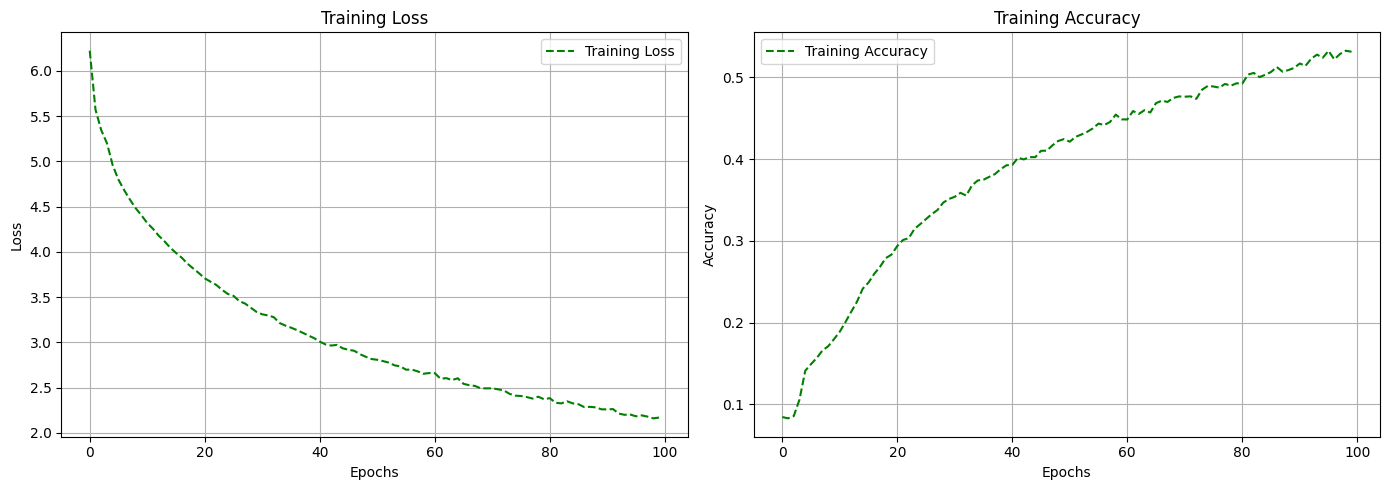

In [198]:
fig_lstm2_lr()

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>
<ul>

- Training loss
    - For the training loss, it starts relatively  and drops steadily
- Training accuracy
    - For the training accuracy, it increases steadily before reaching a train accuacy of 50+ percent

</div>

#### Analyse the Result

In [199]:
pd.Series(results_lstm2_lr)

Model Name    sequential
Epochs               100
Batch Size           128
Train Loss      2.159825
Train Acc       0.532781
dtype: object

#### Running on the seed texts

In [200]:
all_scores = []

for i in range(len(seed_texts)):
    scores = evaluate_text_generation(gru_model, semantic_model, seed_texts, i, creativity_index, lexical_diversity)
    all_scores.append(scores)

df_scores_lstm2_lr = pd.DataFrame(all_scores)
df_scores_lstm2_lr['seed_text'] = seed_texts 
df_scores_lstm2_lr

,bleu_score,rouge_score,creativity_index,lexical_diversity,cosine_similarity,generated_text,seed_text
0,2.969919e-78,0.375000,0.769231,1.000000,0.560977,embrace each day with a angstrom unit heart wax full of gratitude and,embrace each day
1,5.233428e-155,0.285714,0.833333,1.000000,0.489340,radiate some hope and let it be the sunrise in your darkest,radiate some
2,5.233428e-155,0.307692,0.818182,0.916667,0.223665,believe that in the righteous your heart write the way for others,believe that
3,2.460137e-01,0.444444,0.714286,1.000000,0.743330,life's actual purpose is reflected with the opportunities within our experiences and deeds flight,life's actual purpose is
4,2.460137e-01,0.500000,0.666667,1.000000,0.583008,dance through each and every day is a fresh canvas paint it with vibrant strokes,dance through each and every
5,2.460137e-01,0.555556,0.615385,0.866667,0.558622,let your time and energy be the foundation of a joyful heart be your inner,let your time and energy
6,2.969919e-78,0.375000,0.769231,1.000000,0.389237,every person is you in your world dreams towards a brighter version of,every person is
7,1.777835e-01,0.533333,0.636364,0.785714,0.646150,our country Singapore is a legacy of a reflection of the brushstrokes of survival,our country Singapore is
8,2.969919e-78,0.400000,0.750000,0.923077,0.608289,planet earth is the melody of your story and let your heart write,planet earth is
9,3.013040e-01,0.545455,0.625000,1.000000,0.721910,morning and evening would make it is a stepping stone to success the future of our,morning and evening would make it


In [308]:
df_scores_lstm2_lr[['bleu_score'	,'rouge_score',	'creativity_index',	'lexical_diversity',	'cosine_similarity']].mean()

bleu_score           0.121713
rouge_score          0.432219
creativity_index     0.719768
lexical_diversity    0.949212
cosine_similarity    0.552453
dtype: float64

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>
<ul>

- From above, we can see that the text is pretty logical, and the mean score for creatvity is 0.71, diversity is 0.94 and cosine similarity is 0.55, indicating a worser response

</div>

### GRU

In [207]:
def gru_model_reg(input_length, total_words, embedding_dim=64, gru_units=64, dropout_rate=0.2, recurrent_dropout_rate=0.2, l2_lambda=0.01):
    model = Sequential()
    model.add(Embedding(input_dim=total_words, output_dim=embedding_dim, input_length=input_length))
    model.add(GRU(units=gru_units, return_sequences=True, dropout=dropout_rate, recurrent_dropout=recurrent_dropout_rate))
    model.add(GRU(units=gru_units, dropout=dropout_rate, recurrent_dropout=recurrent_dropout_rate))

    model.add(Dropout(dropout_rate))

    model.add(Dense(units=total_words, activation='softmax', kernel_regularizer=l2(l2_lambda)))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

#### Running the Model

In [208]:
gru_model_lr = gru_model_reg(max_sequence_len-1, total_words_aug)
gru_model_lr.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 34, 64)            95872     
                                                                 
 gru (GRU)                   (None, 34, 64)            24960     
                                                                 
 gru_1 (GRU)                 (None, 64)                24960     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1498)              97370     
                                                                 
Total params: 243,162
Trainable params: 243,162
Non-trainable params: 0
_________________________________________________________________


In [209]:
results_gru_lr, fig_gru_lr = evaluator.model_evaluate( x_aug, y_aug , gru_model_lr, base_hparams)

Epoch 1/100
118/118 [==============================] - 29s 223ms/step - loss: 6.4218 - accuracy: 0.0839 - lr: 0.0010
Epoch 2/100
118/118 [==============================] - 27s 231ms/step - loss: 5.6964 - accuracy: 0.0847 - lr: 0.0010
Epoch 3/100
118/118 [==============================] - 29s 243ms/step - loss: 5.6757 - accuracy: 0.0857 - lr: 0.0010
Epoch 4/100
118/118 [==============================] - 32s 273ms/step - loss: 5.6708 - accuracy: 0.0840 - lr: 0.0010
Epoch 5/100
118/118 [==============================] - 30s 255ms/step - loss: 5.6676 - accuracy: 0.0831 - lr: 0.0010
Epoch 6/100
118/118 [==============================] - 30s 256ms/step - loss: 5.6638 - accuracy: 0.0839 - lr: 0.0010
Epoch 7/100
118/118 [==============================] - 29s 243ms/step - loss: 5.6603 - accuracy: 0.0855 - lr: 0.0010
Epoch 8/100
118/118 [==============================] - 30s 258ms/step - loss: 5.6564 - accuracy: 0.0860 - lr: 0.0010
Epoch 9/100
118/118 [==============================] - 29s 247ms

#### Analyse the Graph

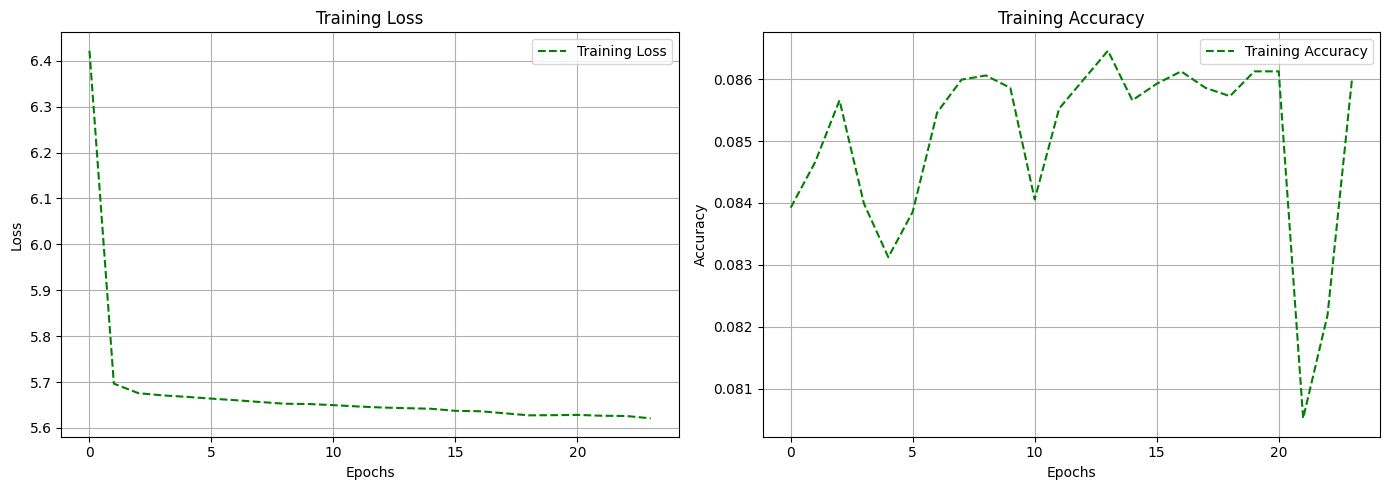

In [210]:
fig_gru_lr()

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>
<ul>

- Training loss
    - For the training loss, it starts relatively  and drops steadily
- Training accuracy
    - For the training accuracy, it encounters multiple spikes along the way

</div>

#### Analyse the Result

In [211]:
pd.Series(results_gru_lr)

Model Name    sequential
Epochs                24
Batch Size           128
Train Loss       5.64299
Train Acc        0.08646
dtype: object

#### Running on the seed texts

In [212]:
all_scores = []

for i in range(len(seed_texts)):
    scores = evaluate_text_generation(gru_model, semantic_model, seed_texts, i, creativity_index, lexical_diversity)
    all_scores.append(scores)

df_scores_gru_lr = pd.DataFrame(all_scores)
df_scores_gru_lr['seed_text'] = seed_texts 
df_scores_gru_lr

,bleu_score,rouge_score,creativity_index,lexical_diversity,cosine_similarity,generated_text,seed_text
0,2.969919e-78,0.400000,0.750000,0.923077,0.682862,embrace each day with a heart full of gratitude and light and kindness,embrace each day
1,5.233428e-155,0.285714,0.833333,1.000000,0.489340,radiate some hope and let it be the sunrise in your darkest,radiate some
2,5.233428e-155,0.307692,0.818182,0.916667,0.223665,believe that in the righteous your heart write the way for others,believe that
3,2.460137e-01,0.444444,0.714286,1.000000,0.764179,life's actual purpose is reflected with the future of our experiences and choices go,life's actual purpose is
4,2.460137e-01,0.500000,0.666667,1.000000,0.583008,dance through each and every day is a fresh canvas paint it with vibrant strokes,dance through each and every
5,2.460137e-01,0.526316,0.642857,0.933333,0.558077,let your time and energy be the north star that guides you home your journey,let your time and energy
6,2.969919e-78,0.428571,0.727273,0.846154,0.481058,every person is a testament in the every beauty of yourself in you,every person is
7,1.777835e-01,0.500000,0.666667,0.857143,0.613293,our country Singapore is a brushstroke a stroke of the brushstrokes of survival where,our country Singapore is
8,2.969919e-78,0.400000,0.750000,0.923077,0.665184,planet earth is the melody of your story your soul and let it,planet earth is
9,3.013040e-01,0.545455,0.625000,1.000000,0.685081,morning and evening would make it us of the tranquility to follow our dreams into sand,morning and evening would make it


In [309]:
df_scores_gru_lr[['bleu_score'	,'rouge_score',	'creativity_index',	'lexical_diversity',	'cosine_similarity']].mean()

bleu_score           0.121713
rouge_score          0.433819
creativity_index     0.719426
lexical_diversity    0.939945
cosine_similarity    0.574575
dtype: float64

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>
<ul>

- From above, we can see that the text is pretty logical, and the mean score for creatvity is 0.71, diversity is 0.94 and cosine similarity is 0.55, indicating a worser response

</div>

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>
<ul>

- Overall, we can see that the adding of regularisation did not improve the model

</div>

<a class="anchor" id="3"></a>
## <font color='#71a1e3'>__Model Improvement - Cosine Annealing__</font>
<hr style="height:1.5px;border-width:0;background-color: #4c8c77">

Here is try a consine annealing 

### Cosine Annealing 


- Type of learning rate schedule that has the effect of starting with a large learning rate that is relatively rapidly decreased to a minimum value before being increased rapidly again
- The resetting of the learning rate acts like a simulated restart of the learning process and the re-use of good weights as the starting point of the restart is referred to as a "warm restart" in contrast to a "cold restart" where a new set of small random numbers may be used as a starting point


In [224]:
def lr_warmup_cosine_decay(global_step=10, warmup_steps=100, hold=0, total_steps=1000, start_lr=0.01, target_lr=1e-3):
    if total_steps <= warmup_steps:
        raise ValueError("total_steps must be greater than warmup_steps.")
    global_step = float(global_step)
    warmup_steps = float(warmup_steps)
    hold = float(hold)
    total_steps = float(total_steps)
    start_lr = float(start_lr)
    target_lr = float(target_lr)

    if global_step < warmup_steps:
        warmup_lr = start_lr + (target_lr - start_lr) * (global_step / warmup_steps)
        return warmup_lr
    elif global_step <= warmup_steps + hold:
        return target_lr
    else:
        decayed = 0.5 * (1 + np.cos(np.pi * (global_step - warmup_steps - hold) / (total_steps - warmup_steps - hold)))
        decayed_lr = target_lr + (start_lr - target_lr) * decayed
        return decayed_lr

### LSTM2 Model

In [229]:
def lstm_model2(input_length,total_words, embedding_dim=240, lstm_units=150, dropout_rate=0.2, learning_rate=0.001):
    model = Sequential()

    model.add(Embedding(total_words, embedding_dim, input_shape=(input_length,)))

    model.add((LSTM(lstm_units, return_sequences=True)))
    model.add(Dropout(dropout_rate))


    model.add(LSTM(lstm_units, return_sequences=True))
    model.add(Dropout(dropout_rate))

    model.add(LSTM(lstm_units))
    model.add(Dropout(dropout_rate))

    model.add(Dense(total_words / 2, activation='relu'))  
    model.add(Dense(total_words, activation='softmax'))

    # Compile the model
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lr_warmup_cosine_decay)

In [230]:
lstm2_model = lstm_model2(max_sequence_len - 1, total_words_aug)
lstm2_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 34, 240)           359520    
                                                                 
 lstm (LSTM)                 (None, 34, 150)           234600    
                                                                 
 dropout (Dropout)           (None, 34, 150)           0         
                                                                 
 lstm_1 (LSTM)               (None, 34, 150)           180600    
                                                                 
 dropout_1 (Dropout)         (None, 34, 150)           0         
                                                                 
 lstm_2 (LSTM)               (None, 150)               180600    
                                                                 
 dropout_2 (Dropout)         (None, 150)               0

#### Running the Model

In [231]:
results_lstm2_lr, fig_lstm2_lr = evaluator.model_evaluate( x_aug, y_aug , lstm2_model, base_hparams,callbacks=[EarlyStopping(monitor='accuracy', patience=10, restore_best_weights=True), ReduceLROnPlateau(patience=5), lr_schedule])

Epoch 1/100
118/118 [==============================] - 16s 122ms/step - loss: 5.5457 - accuracy: 0.0812 - lr: 0.0100
Epoch 2/100
118/118 [==============================] - 14s 120ms/step - loss: 5.0265 - accuracy: 0.1270 - lr: 0.0100
Epoch 3/100
118/118 [==============================] - 11s 95ms/step - loss: 4.6620 - accuracy: 0.1841 - lr: 0.0100
Epoch 4/100
118/118 [==============================] - 9s 76ms/step - loss: 4.3061 - accuracy: 0.2321 - lr: 0.0100
Epoch 5/100
118/118 [==============================] - 10s 83ms/step - loss: 3.9688 - accuracy: 0.2730 - lr: 0.0100
Epoch 6/100
118/118 [==============================] - 11s 95ms/step - loss: 3.7027 - accuracy: 0.3127 - lr: 0.0100
Epoch 7/100
118/118 [==============================] - 10s 82ms/step - loss: 3.4705 - accuracy: 0.3378 - lr: 0.0100
Epoch 8/100
118/118 [==============================] - 10s 87ms/step - loss: 3.2989 - accuracy: 0.3525 - lr: 0.0100
Epoch 9/100
118/118 [==============================] - 10s 86ms/step - 

#### Analyse the Graph

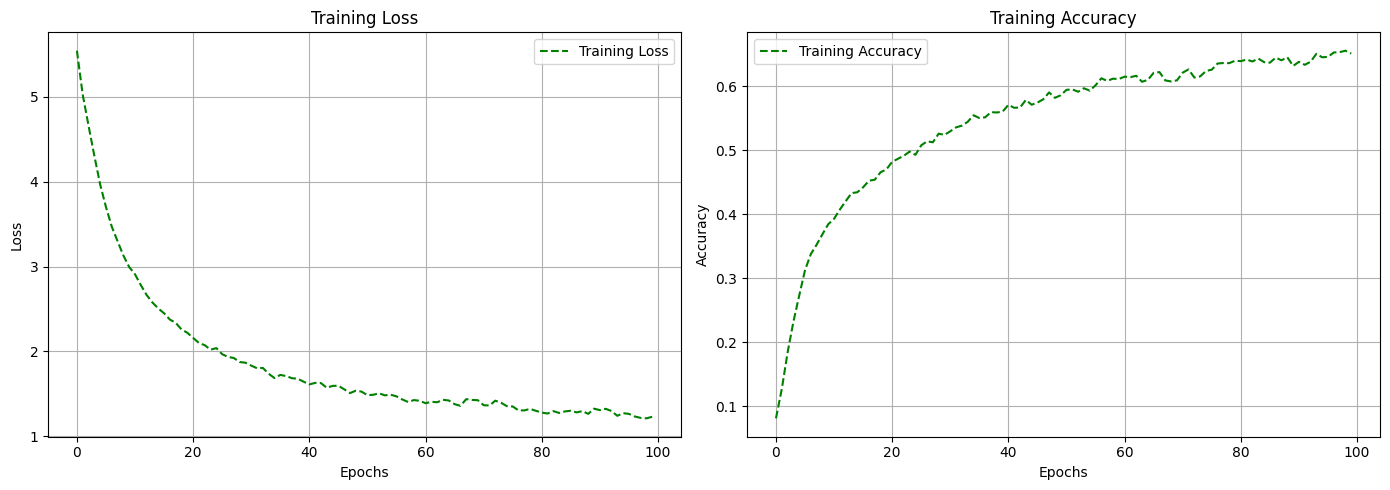

In [232]:
fig_lstm2_lr()

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>
<ul>

- Training loss
    - For the training loss, it starts relatively  and drops steadily
- Training accuracy
    - For the training accuracy, it increases steadily to 60+ percent

</div>

#### Analyse the Result

In [233]:
pd.Series(results_lstm2_lr)

Model Name    sequential
Epochs               100
Batch Size           128
Train Loss      1.210638
Train Acc       0.655294
dtype: object

#### Running on the seed texts

In [234]:
all_scores = []

for i in range(len(seed_texts)):
    scores = evaluate_text_generation(gru_model, semantic_model, seed_texts, i, creativity_index, lexical_diversity)
    all_scores.append(scores)

df_scores_lstm2_clr = pd.DataFrame(all_scores)
df_scores_lstm2_clr['seed_text'] = seed_texts 
df_scores_lstm2_clr

,bleu_score,rouge_score,creativity_index,lexical_diversity,cosine_similarity,generated_text,seed_text
0,2.969919e-78,0.375000,0.769231,1.000000,0.664874,embrace each day with a heart full of gratitude and kindness be the,embrace each day
1,5.233428e-155,0.285714,0.833333,1.000000,0.258687,radiate some kindness and become a force for good in the world,radiate some
2,5.233428e-155,0.307692,0.818182,0.916667,0.258384,believe that in the righteous your heart write the way and possibilities,believe that
3,2.460137e-01,0.444444,0.714286,1.000000,0.599358,life's actual purpose is reflected hoosier state in the eyes of those we eye,life's actual purpose is
4,2.460137e-01,0.500000,0.666667,1.000000,0.573005,dance through each and every act of love is a tribute to the boundless power,dance through each and every
5,2.460137e-01,0.526316,0.642857,0.933333,0.558077,let your time and energy be the north star that guides you home your journey,let your time and energy
6,2.796152e-78,0.428571,0.727273,0.857143,0.406671,every person is a reminder of the earth's star of a life that,every person is
7,1.777835e-01,0.444444,0.714286,1.000000,0.636346,our country Singapore is the legacy of a transition force to survival where strength,our country Singapore is
8,2.969919e-78,0.400000,0.750000,0.923077,0.653155,planet earth is the melody of your soul and let your heart write,planet earth is
9,3.013040e-01,0.600000,0.571429,0.875000,0.748496,morning and evening would make it us are the rhythm of your dreams and aspirations it,morning and evening would make it


In [310]:
df_scores_lstm2_clr[['bleu_score'	,'rouge_score',	'creativity_index',	'lexical_diversity',	'cosine_similarity']].mean()

bleu_score           0.121713
rouge_score          0.431218
creativity_index     0.720754
lexical_diversity    0.950522
cosine_similarity    0.535705
dtype: float64

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>
<ul>

- From above, we can see that the text is not very good, and the mean score for creatvity is 0.72, diversity is 0.94 and cosine similarity is 0.53, indicating a worser response

</div>

<a class="anchor" id="3"></a>
## <font color='#71a1e3'>__Hyperparameter Tuning__</font>
<hr style="height:1.5px;border-width:0;background-color: #4c8c77">

Here is to hyperparamter tune

### LSTM2

In [253]:
def build_lstm2_model(hp):
    model = Sequential()

    model.add(Embedding(
        input_dim=total_words_aug,
        output_dim=hp.Choice('embedding_dim', [32, 64, 128]),
        input_length=max_sequence_len - 1))

    # Using a single LSTM layer
    model.add(LSTM(units=hp.Choice('lstm_units', [32, 64, 128])))

    # Optional Dropout
    model.add(Dropout(hp.Choice('dropout_rate', [0.1, 0.2, 0.3])))

    # Dense layer before output
    model.add(Dense(total_words_aug // 2, activation='relu'))

    # Output layer
    model.add(Dense(total_words_aug, activation='softmax'))

    model.compile(
        optimizer=Adam(hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')),
        loss='categorical_crossentropy',
        metrics=['accuracy'])

    return model

In [254]:
tuner = RandomSearch(
    build_lstm2_model,
    objective='accuracy',
    max_trials=10,  
    executions_per_trial=1,
    directory='dir1',
    project_name='lstm2_hyperparam_tuning'
)

tuner.search(x_aug, y_aug,validation_split = 0.2, epochs=50,callbacks=[EarlyStopping(monitor='accuracy', patience=10, restore_best_weights=True), ReduceLROnPlateau(patience=5)])

Trial 10 Complete [00h 05m 05s]
accuracy: 0.6453012824058533

Best accuracy So Far: 0.710983157157898
Total elapsed time: 01h 33m 07s


#### Getting the best model

In [255]:
best_model_lstm = tuner.get_best_models(num_models=1)[0]

In [256]:
best_model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 34, 128)           191744    
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 749)               48685     
                                                                 
 dense_1 (Dense)             (None, 1498)              1123500   
                                                                 
Total params: 1,413,337
Trainable params: 1,413,337
Non-trainable params: 0
_________________________________________________________________


In [257]:
results_lstm2_hp, fig_lstm2_hp = evaluator.model_evaluate( x_aug, y_aug , best_model_lstm, base_hparams,callbacks=[EarlyStopping(monitor='accuracy', patience=10, restore_best_weights=True), ReduceLROnPlateau(patience=5)])

Epoch 1/100
118/118 [==============================] - 8s 61ms/step - loss: 2.1576 - accuracy: 0.6552 - lr: 2.5086e-07
Epoch 2/100
118/118 [==============================] - 7s 58ms/step - loss: 2.1522 - accuracy: 0.6530 - lr: 2.5086e-07
Epoch 3/100
118/118 [==============================] - 7s 58ms/step - loss: 2.1568 - accuracy: 0.6543 - lr: 2.5086e-07
Epoch 4/100
118/118 [==============================] - 7s 58ms/step - loss: 2.1481 - accuracy: 0.6548 - lr: 2.5086e-07
Epoch 5/100
118/118 [==============================] - 7s 58ms/step - loss: 2.1434 - accuracy: 0.6588 - lr: 2.5086e-07
Epoch 6/100
118/118 [==============================] - 7s 56ms/step - loss: 2.1424 - accuracy: 0.6534 - lr: 2.5086e-07
Epoch 7/100
118/118 [==============================] - 6s 50ms/step - loss: 2.1502 - accuracy: 0.6541 - lr: 2.5086e-07
Epoch 8/100
118/118 [==============================] - 6s 50ms/step - loss: 2.1376 - accuracy: 0.6547 - lr: 2.5086e-07
Epoch 9/100
118/118 [===========================

#### Analyse the Graph

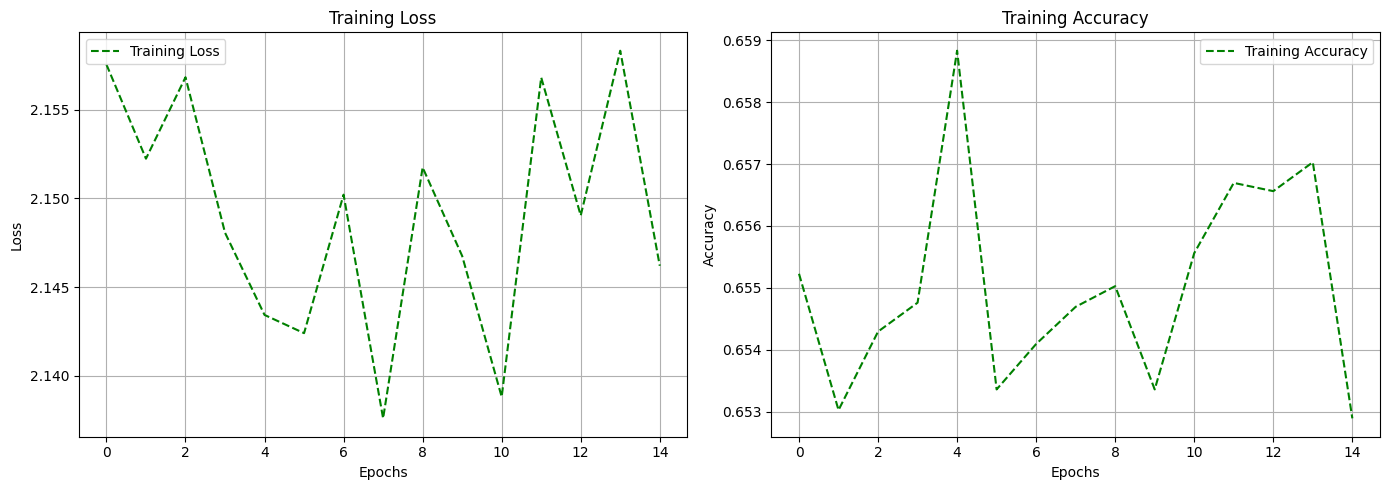

In [259]:
fig_lstm2_hp()

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>
<ul>

- Training loss
    - For the training loss, it encounter multiple spikes
- Training accuracy
    - For the training accuracy, it encounter multiple spikes

</div>

#### Analyse the Result

In [260]:
pd.Series(results_lstm2_hp)

Model Name    sequential
Epochs                15
Batch Size           128
Train Loss      2.143427
Train Acc       0.658833
dtype: object

#### Running on the seed texts

In [262]:
all_scores = []

for i in range(len(seed_texts)):
    scores = evaluate_text_generation(best_model_lstm, semantic_model, seed_texts, i, creativity_index, lexical_diversity)
    all_scores.append(scores)

df_scores_lstm2_hp = pd.DataFrame(all_scores)
df_scores_lstm2_hp['seed_text'] = seed_texts 
df_scores_lstm2_hp

,bleu_score,rouge_score,creativity_index,lexical_diversity,cosine_similarity,generated_text,seed_text
0,2.969919e-78,0.375000,0.769231,1.000000,0.790284,embrace each day is a celebration of the canvas for humanity we share,embrace each day
1,5.233428e-155,0.285714,0.833333,1.000000,0.358515,radiate some hope and let it be the armor that shields your,radiate some
2,5.233428e-155,0.307692,0.818182,0.916667,0.280971,believe that let your smile be the compass that guides you home,believe that
3,2.460137e-01,0.444444,0.714286,1.000000,0.661715,life's actual purpose is a classroom where we learn to love unconditionally shine with,life's actual purpose is
4,2.460137e-01,0.526316,0.642857,0.933333,0.542746,dance through each and every corner of the heart at each species new beginnings mind,dance through each and every
5,2.140909e-01,0.526316,0.642857,0.882353,0.408210,let your time and energy will louder than words ever could could safari's mysteries singapore's,let your time and energy
6,2.644437e-78,0.375000,0.769231,1.000000,0.189050,every person is a tale that protect the ecosystems gardens' serenity singapore's nature,every person is
7,1.777835e-01,0.444444,0.714286,1.000000,0.605947,our country Singapore is the foundation of nature each one towards witnessing miracles a,our country Singapore is
8,2.969919e-78,0.375000,0.769231,1.000000,0.594677,planet earth is the echoes of self exploration painting your world sparks and,planet earth is
9,3.013040e-01,0.571429,0.600000,0.937500,0.657979,morning and evening would make it carries the sky with hues of kindness and meaning fully,morning and evening would make it


In [311]:
df_scores_lstm2_hp[['bleu_score'	,'rouge_score',	'creativity_index',	'lexical_diversity',	'cosine_similarity']].mean()

bleu_score           0.118521
rouge_score          0.423136
creativity_index     0.727349
lexical_diversity    0.966985
cosine_similarity    0.509009
dtype: float64

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>
<ul>

- From above, we can see that the text is ok, and the mean score for creatvity is 0.71, diversity is 0.97 and cosine similarity is 0.50, indicating a ok response

</div>

### GRU

In [271]:
def build_gru_model(hp):
    model = Sequential()
    
    model.add(Embedding(
        input_dim=total_words_aug, 
        output_dim=hp.Choice('embedding_dim', values=[64, 128]),  
        input_length=max_sequence_len-1))  

    model.add(GRU(units=hp.Choice('gru_units', values=[64, 128]), return_sequences=False))

    # Output Layer
    model.add(Dense(units=total_words_aug, activation='softmax'))

    # Compile the model
    model.compile(
        optimizer=Adam(hp.Choice('learning_rate', values=[1e-3, 1e-4])),
        loss='categorical_crossentropy',
        metrics=['accuracy'])

    return model

In [273]:
tuner = RandomSearch(
    build_gru_model,
    objective='val_accuracy',
    max_trials=5,  
    executions_per_trial=1,
    directory='dir3',
    project_name='lstm_hyperparam_tuning'
)

tuner.search(x_aug, y_aug,validation_split = 0.2, epochs=50,callbacks=[EarlyStopping(monitor='accuracy', patience=10, restore_best_weights=True), ReduceLROnPlateau(patience=5)])

Trial 5 Complete [00h 06m 25s]
val_accuracy: 0.46662217378616333

Best val_accuracy So Far: 0.49399200081825256
Total elapsed time: 00h 22m 38s


#### Getting the best model

In [277]:
best_model_gru= tuner.get_best_models(num_models=1)[0]

In [278]:
best_model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 34, 128)           191744    
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense (Dense)               (None, 1498)              97370     
                                                                 
Total params: 326,362
Trainable params: 326,362
Non-trainable params: 0
_________________________________________________________________


In [279]:
results_gru_hp, fig_gru_hp = evaluator.model_evaluate( x_aug, y_aug , best_model_gru, base_hparams,callbacks=[EarlyStopping(monitor='accuracy', patience=10, restore_best_weights=True), ReduceLROnPlateau(patience=5)])

Epoch 1/100
118/118 [==============================] - 6s 41ms/step - loss: 1.5202 - accuracy: 0.7365 - lr: 1.0000e-04
Epoch 2/100
118/118 [==============================] - 5s 41ms/step - loss: 1.4959 - accuracy: 0.7392 - lr: 1.0000e-04
Epoch 3/100
118/118 [==============================] - 5s 41ms/step - loss: 1.4792 - accuracy: 0.7408 - lr: 1.0000e-04
Epoch 4/100
118/118 [==============================] - 5s 39ms/step - loss: 1.4653 - accuracy: 0.7427 - lr: 1.0000e-04
Epoch 5/100
118/118 [==============================] - 4s 37ms/step - loss: 1.4532 - accuracy: 0.7441 - lr: 1.0000e-04
Epoch 6/100
118/118 [==============================] - 4s 36ms/step - loss: 1.4423 - accuracy: 0.7449 - lr: 1.0000e-04
Epoch 7/100
118/118 [==============================] - 4s 35ms/step - loss: 1.4323 - accuracy: 0.7459 - lr: 1.0000e-04
Epoch 8/100
118/118 [==============================] - 4s 37ms/step - loss: 1.4230 - accuracy: 0.7470 - lr: 1.0000e-04
Epoch 9/100
118/118 [===========================

#### Analyse the Graph

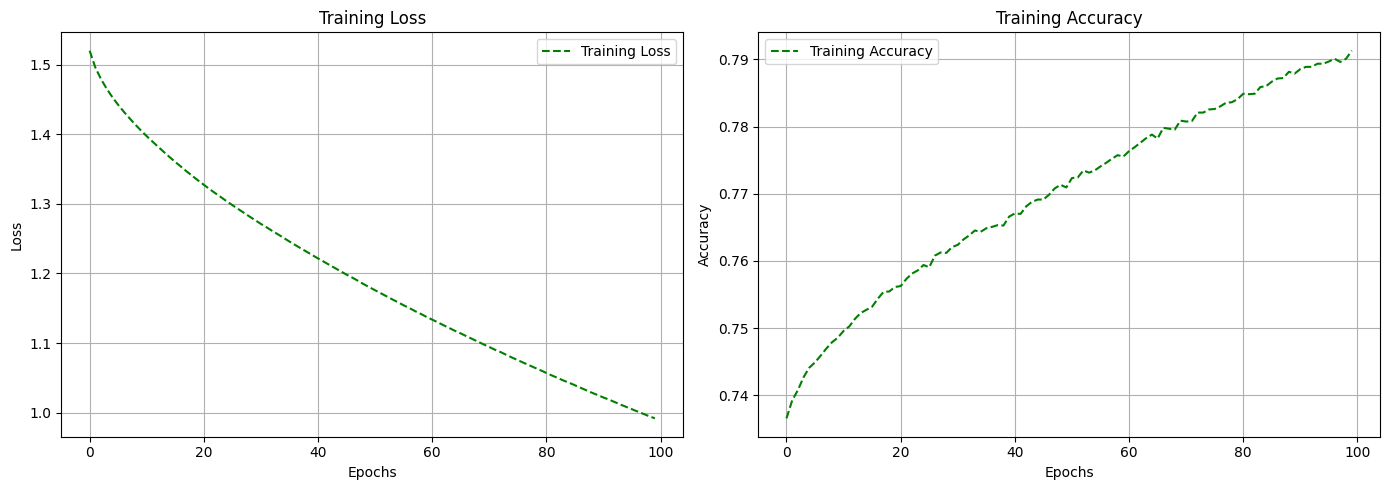

In [280]:
fig_gru_hp()

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>
<ul>

- Training loss
    - For the training loss, it shows a steady decrease
- Training accuracy
    - For the training accuracy, it shows a steady increase

</div>

#### Analyse the Result

In [281]:
pd.Series(results_gru_hp)

Model Name    sequential
Epochs               100
Batch Size           128
Train Loss      0.991768
Train Acc       0.791294
dtype: object

#### Running on the seed texts

In [282]:
all_scores = []

for i in range(len(seed_texts)):
    scores = evaluate_text_generation(best_model_gru, semantic_model, seed_texts, i, creativity_index, lexical_diversity)
    all_scores.append(scores)

df_scores_gru_hp = pd.DataFrame(all_scores)
df_scores_gru_hp['seed_text'] = seed_texts 
df_scores_gru_hp

,bleu_score,rouge_score,creativity_index,lexical_diversity,cosine_similarity,generated_text,seed_text
0,2.969919e-78,0.375000,0.769231,1.000000,0.725407,embrace each day for it is the mark of a truly great soul,embrace each day
1,5.233428e-155,0.285714,0.833333,1.000000,0.266597,radiate some hope and let it be the legacy of your dreams,radiate some
2,5.233428e-155,0.285714,0.833333,1.000000,0.283513,believe that technology light up let your true future of nature is,believe that
3,2.289416e-01,0.444444,0.714286,0.937500,0.645331,life's actual purpose is a tapestry woven with threads of love and our planet's,life's actual purpose is
4,2.460137e-01,0.526316,0.642857,0.933333,0.577739,dance through each and every opportunity is a door to a legacy of our inner,dance through each and every
5,2.460137e-01,0.526316,0.642857,0.933333,0.722873,let your time and energy be the fuel that powers your journey a gift to,let your time and energy
6,2.969919e-78,0.375000,0.769231,1.000000,0.418351,every person is a beacon of light in the strength and you forward,every person is
7,1.777835e-01,0.470588,0.692308,0.928571,0.691141,our country Singapore is a celebration of every step we take towards our dreams,our country Singapore is
8,2.969919e-78,0.428571,0.727273,0.846154,0.603473,planet earth is the symphony of your dreams let your heart lead the,planet earth is
9,3.013040e-01,0.571429,0.600000,0.937500,0.663052,morning and evening would make it is limitless towards miracles an opportunity for growth and learning,morning and evening would make it


In [312]:
df_scores_gru_hp[['bleu_score'	,'rouge_score',	'creativity_index',	'lexical_diversity',	'cosine_similarity']].mean()

bleu_score           0.120006
rouge_score          0.428909
creativity_index     0.722471
lexical_diversity    0.951639
cosine_similarity    0.559748
dtype: float64

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>
<ul>

- From above, we can see that the text is ok, and the mean score for creatvity is 0.72, diversity is 0.95 and cosine similarity is 0.55, indicating a ok response

</div>

<a class="anchor" id="3"></a>
## <font color='#71a1e3'>__Final Models__</font>
<hr style="height:1.5px;border-width:0;background-color: #4c8c77">

Here is to final test the model

#### LSTM2 With Synonym Replacement

In [ ]:
lstm2_model = lstm_model2(max_sequence_len-1, total_words_aug)
lstm2_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 35, 240)           327360    
                                                                 
 lstm (LSTM)                 (None, 35, 150)           234600    
                                                                 
 dropout (Dropout)           (None, 35, 150)           0         
                                                                 
 lstm_1 (LSTM)               (None, 35, 150)           180600    
                                                                 
 dropout_1 (Dropout)         (None, 35, 150)           0         
                                                                 
 lstm_2 (LSTM)               (None, 150)               180600    
                                                                 
 dropout_2 (Dropout)         (None, 150)               0

In [ ]:
results_lstm2_sr, fig_lstm2_sr = evaluator.model_evaluate(x_aug, y_aug ,lstm2_model, base_hparams ,  callbacks=[EarlyStopping(monitor='accuracy', patience=10, restore_best_weights=True), ReduceLROnPlateau(patience=5)])

#### Analyse the Graph

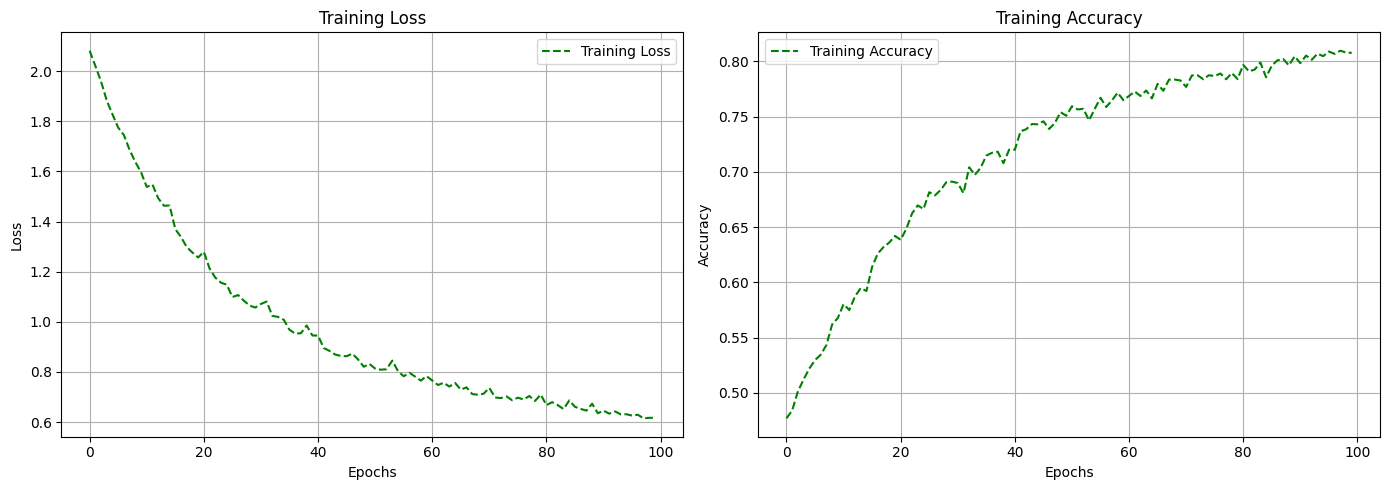

In [ ]:
fig_lstm2_sr()

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>
<ul>

- Training loss
    - For the training loss, it starts relatively  and drops steadily
- Training accuracy
    - For the training accuracy, it increases steadily before reaching a train accuacy of 80+ percent

</div>

#### Analyse the Result

In [ ]:
pd.Series(results_lstm2_sr)

Model Name    sequential
Epochs               100
Batch Size           128
Train Loss      0.615008
Train Acc       0.809587
dtype: object

### FInal Testing

In [322]:
for _ in range(5):
    all_scores = []

    for i in range(len(seed_texts)):
        scores = evaluate_text_generation(lstm2_model, semantic_model, seed_texts, i, creativity_index, lexical_diversity)
        all_scores.append(scores)

    final = pd.DataFrame(all_scores)
    final['seed_text'] = seed_texts 
    display(final)

,bleu_score,rouge_score,creativity_index,lexical_diversity,cosine_similarity,generated_text,seed_text
0,2.969919e-78,0.375000,0.769231,1.000000,0.183326,embrace each day stroke role write take learning in confidence brightest faced bountiful,embrace each day
1,5.233428e-155,0.285714,0.833333,1.000000,0.355306,radiate some shore fountainhead reminding pollinators others lullaby start embody storytellers light,radiate some
2,5.019363e-155,0.285714,0.833333,1.000000,0.119489,believe that challenges semakau's army doubt destined victory richness estuaries gateway stream,believe that
3,2.460137e-01,0.444444,0.714286,1.000000,0.481920,life's actual purpose is principles chapters testifies reverberates character barriers flight future will transcends,life's actual purpose is
4,2.289416e-01,0.500000,0.666667,1.000000,0.236163,dance through each and every life's nurtures solace simplest conservation heritage mortal values career focus,dance through each and every
5,2.460137e-01,0.526316,0.642857,0.933333,0.391633,let your time and energy coral ourselves nation fireflies energy forms lashkar generosity reserve find,let your time and energy
6,2.969919e-78,0.375000,0.769231,1.000000,0.307216,every person is solomon around information goodness communication perfect degree determination canyon another,every person is
7,1.777835e-01,0.444444,0.714286,1.000000,0.596164,our country Singapore is breathe bind waiting or bukit directed language shields us turns,our country Singapore is
8,2.969919e-78,0.375000,0.769231,1.000000,0.483606,planet earth is innovation each tree serene making dwells leaving ray waters shields,planet earth is
9,2.646016e-01,0.545455,0.625000,0.944444,0.464201,morning and evening would make it possess village's treasury blossoming human storms jawa's full hindhede lifeblood,morning and evening would make it


,bleu_score,rouge_score,creativity_index,lexical_diversity,cosine_similarity,generated_text,seed_text
0,2.969919e-78,0.375000,0.769231,1.000000,0.347013,embrace each day chains shared gentle on against shine intentions stream produce bubble,embrace each day
1,5.233428e-155,0.285714,0.833333,1.000000,0.286825,radiate some canvases renews strokes transform somebody face significance memories infectious bind,radiate some
2,5.233428e-155,0.285714,0.833333,1.000000,0.019346,believe that beam possess mental unity tent barrier bedrock river constant give,believe that
3,2.460137e-01,0.470588,0.692308,0.933333,0.557909,life's actual purpose is tender reside like potential role opportunity world transubstantiate them world,life's actual purpose is
4,2.460137e-01,0.500000,0.666667,1.000000,0.445983,dance through each and every canyons ambition coney obstacle flow susurration propels pieces appreciation blooms,dance through each and every
5,2.460137e-01,0.526316,0.642857,0.933333,0.560668,let your time and energy meaning ambition meaning wave connection filling keys sparks caves together,let your time and energy
6,2.969919e-78,0.375000,0.769231,1.000000,0.205950,every person is possess discover open spread palette calling fantastic stages weave directed,every person is
7,1.777835e-01,0.444444,0.714286,1.000000,0.535853,our country Singapore is elders planet mortal heal bitterness oyster forms breathe eyes appreciation,our country Singapore is
8,2.969919e-78,0.375000,0.769231,1.000000,0.524906,planet earth is tranquil horizon self flourish propels remind classroom pave alleys a,planet earth is
9,3.013040e-01,0.545455,0.625000,1.000000,0.413052,morning and evening would make it grow haw marina cherish stroke allows forth discover whispers planted,morning and evening would make it


,bleu_score,rouge_score,creativity_index,lexical_diversity,cosine_similarity,generated_text,seed_text
0,2.969919e-78,0.375000,0.769231,1.000000,0.323272,embrace each day everyone recreation passion inside admonisher dreams industry prelude turbulent technology,embrace each day
1,5.233428e-155,0.285714,0.833333,1.000000,0.405286,radiate some affectionateness spoken shadows thriving fresh ourselves reach are pulau cities,radiate some
2,5.233428e-155,0.285714,0.833333,1.000000,0.193377,believe that embodies commitment symphonic encourages destined serenity our grudges they the,believe that
3,2.460137e-01,0.444444,0.714286,1.000000,0.436920,life's actual purpose is leave decision transubstantiate houses endowment achieve inside with impossible greater,life's actual purpose is
4,2.289416e-01,0.500000,0.666667,1.000000,0.506053,dance through each and every embodies stones sun's vital grass savannas vision weaving joyful them,dance through each and every
5,2.460137e-01,0.500000,0.666667,1.000000,0.553899,let your time and energy song kindness deserves role points stepping come reality natural flow,let your time and energy
6,2.969919e-78,0.375000,0.769231,1.000000,0.222302,every person is tempestuous storytellers limitation punggol joyful haven marine mountain underwater jewels,every person is
7,1.431712e-01,0.444444,0.714286,0.941176,0.542926,our country Singapore is jawa's embracing rising humanity lullaby plant glaciers chestnut cannot esplanade's,our country Singapore is
8,2.969919e-78,0.375000,0.769231,1.000000,0.454575,planet earth is painful adaptability tread adventures amazing harmony mountain lullaby difference weary,planet earth is
9,3.013040e-01,0.545455,0.625000,1.000000,0.558463,morning and evening would make it nurture unlocking simple trails unity directed barrier only peculiarity moment,morning and evening would make it


,bleu_score,rouge_score,creativity_index,lexical_diversity,cosine_similarity,generated_text,seed_text
0,2.796152e-78,0.375000,0.769231,1.000000,0.415243,embrace each day world winter's teeming paints jurong lived ball live letter futures,embrace each day
1,5.019363e-155,0.285714,0.833333,1.000000,0.243904,radiate some river commitment inwards act focus testifies plant new reservoir's patience,radiate some
2,4.829608e-155,0.285714,0.833333,0.928571,0.193155,believe that word crown inheritance guidance transform learn life's winter's turning emotions,believe that
3,2.460137e-01,0.444444,0.714286,1.000000,0.485521,life's actual purpose is run chest extent birds comprehend turn leads resonates universal southeast,life's actual purpose is
4,2.460137e-01,0.500000,0.666667,1.000000,0.615575,dance through each and every disguise hear darkness uncovered peaceful focus endeavor nights degree winds,dance through each and every
5,2.460137e-01,0.500000,0.666667,1.000000,0.458678,let your time and energy defy transcending washes open pages sungei savoring industry leaving sets,let your time and energy
6,2.969919e-78,0.375000,0.769231,1.000000,0.191762,every person is touches understood lands experiences taken give promises courage difference forest,every person is
7,1.777835e-01,0.444444,0.714286,1.000000,0.580045,our country Singapore is cultures chek fountainhead faith coral lead daydream limits sleep witness,our country Singapore is
8,2.796152e-78,0.375000,0.769231,1.000000,0.377939,planet earth is chinatown's plateaus beaches make significance cherish sweep word serves meet,planet earth is
9,3.013040e-01,0.545455,0.625000,1.000000,0.443645,morning and evening would make it lagoons canyon never will hug weaves wounds often unique orchard,morning and evening would make it


,bleu_score,rouge_score,creativity_index,lexical_diversity,cosine_similarity,generated_text,seed_text
0,2.796152e-78,0.375000,0.769231,1.0000,0.368982,embrace each day attempt hug destination road's plant comfort favor nurture asia trails,embrace each day
1,5.233428e-155,0.285714,0.833333,1.0000,0.346448,radiate some deserts humanity lives growth embraces dwells kent most sense lifeblood,radiate some
2,5.233428e-155,0.285714,0.833333,1.0000,0.160853,believe that contagious bun bright reminds than fervour conspire great constant buloh,believe that
3,2.460137e-01,0.444444,0.714286,1.0000,0.566525,life's actual purpose is holds fire away one polar hindhede things symphony leo mortal,life's actual purpose is
4,2.289416e-01,0.500000,0.666667,1.0000,0.330762,dance through each and every embody growth tundras monsoons glam's vitamin career tale grandeur multiplies,dance through each and every
5,2.460137e-01,0.500000,0.666667,1.0000,0.410588,let your time and energy pursue unstoppable giving blossoming discovery spread run sungei understanding incite,let your time and energy
6,2.796152e-78,0.375000,0.769231,1.0000,0.245842,every person is define lands just peaceful leap defy coral desires heart's amp,every person is
7,1.777835e-01,0.444444,0.714286,1.0000,0.576496,our country Singapore is beaches triumphant past incite success bubble significant pieces ideas orchard,our country Singapore is
8,2.969919e-78,0.375000,0.769231,1.0000,0.315615,planet earth is grandeur brush symbol wildlife monophosphate door could barrier rugged peak,planet earth is
9,3.013040e-01,0.571429,0.600000,0.9375,0.554466,morning and evening would make it nursing conceive produce air make encounter hug civilizations lies tales,morning and evening would make it


<a class="anchor" id="3"></a>
## <font color='#71a1e3'>__Summary__</font>
<hr style="height:1.5px;border-width:0;background-color: #4c8c77">

From the above, we do see that the lexical diversity is at 95% and base on looking at 5 different groups of text, the text are reasonale and creative and has some of similarity with the seed text

In [323]:
lstm2_model.save('RNN.h5')